# **Mod24_AIML_FINAL_CAPSTONE: Sales Analysis - Late Delivery Risk and Fraud Detection Analysis**

# **Introduction**

#### **Executive summary**:
This project focuses on building a Sales Fraud and Late Delivery Detection Model to strengthen supply chain integrity and operational efficiency. By leveraging transactional, regional, and customer-level data from a supply chain dataset, the project applies advanced anomaly detection techniques to identify fraudulent sales activity and late delivery patterns. In addition to analyzing customer and sales trends, fraud and delivery anomalies are studied to highlight risks in specific geographies, sales channels, and customer segments.

The outcomes will support strategic decision-making by enabling the company to:

*  Detect and mitigate fraudulent sales transactions before they impact revenue.
*  Identify late delivery patterns and reduce operational inefficiencies.
*  Enhance customer trust and satisfaction by proactively addressing anomalies.
*  Reduce financial losses and reputational risks associated with fraud and delivery failures.

This project develops and compares classification models to detect two business-critical risks in our supply-chain data:

Suspected sales fraud (e.g., abnormal orders, risky payment types, unusual discount/price patterns), and

Late delivery risk (orders likely to miss promised dates).

Early and reliable detection of these anomalies allows operations to verify orders sooner, prioritize shipping, and proactively notify customers, reducing financial loss, service failures, and churn

#### **Rationale**:
Understanding customer behavior is critical for businesses in a competitive marketplace. Fraudulent sales activities and late deliveries present significant challenges to businesses operating in competitive markets. Fraud directly leads to financial losses and inaccurate reporting, while delivery failures damage customer trust and loyalty. Detecting anomalies early allows organizations to implement corrective actions, strengthen internal controls, and optimize logistics strategies.

A fraud and late delivery detection framework helps address these challenges by:

*  Pinpointing suspicious transactions through anomaly detection techniques.
*  Predicting high-risk deliveries based on order, product, and regional attributes.
*  Enhancing monitoring of geographic or product-specific vulnerabilities.
*  Improving allocation of resources to fraud prevention and logistics optimization.

Fraud causes direct losses (chargebacks, write-offs) and indirect costs (support load, brand damage). We focus on higher precision to reduce false alarms for the review team while retaining meaningful recall.

Late deliveries hurt customer satisfaction and may trigger refunds or penalties. Here we emphasize higher recall so we catch as many true late orders as possible while keeping precision acceptable.

A unified, explainable classification pipeline helps teams prioritize actions, improves operational efficiency, and supports data-driven SLAs.
By solving this problem, the company can safeguard revenue, protect brand reputation, and improve customer experiences while minimizing risks in sales and delivery operations.

#### **Research Question**:
The central research question for this project is:

“How can we detect and classify anomalies in sales transactions and delivery records to prevent fraud and reduce late deliveries across regions?”

Supporting sub-questions:

*  Which transaction, product, and delivery attributes most strongly signal fraud or anomalies?
*  How do geographic and regional patterns influence fraud detection and late deliveries?
*  What machine learning models are most effective at detecting fraud and delivery risks?
*  How do preprocessing, feature engineering, and anomaly detection techniques impact model accuracy and interpretability?

#### **Data Sources**

What data will you use to answer your question?

The analysis uses the DataCo Supply Chain dataset, which includes detailed records of customer demographics, transactions, product sales, supply chain operations, and regional information. Specifically:

Customer Data: Demographics and segmentation details.

*  Transaction Data: Sales amounts, order quantities, payment methods, and timestamps.
*  Product Data: Categories, pricing, and supply chain attributes.
*  Supply Chain Data: Order processing, shipping, delivery status, and lead times.
*  Regional Data: Customer location and regional logistics performance.

The dataset used in this project is maintained transparently with the Creative Commons 4.0 license by Fabian Constante, Fernando Silva, and António Pereira through the Mendeley data repository. The dataset consists of roughly 180k transactions from supply chains used by the company DataCo Global for 3 years. This dataset provides a holistic view of customer interactions across regions, enabling robust classification modeling that considers both individual and regional behaviors.

The dataset can be downloaded from:

[DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS](https://data.mendeley.com/datasets/8gx2fvg2k6/5)


**Modeling Approach**

This project aims to compare multiple machine learning classification models to determine which algorithm best classifies customer sales behavior and supports the business objective of improving segmentation, targeting, and revenue growth.

Approach (High Level):

*  Clean, EDA and prepare data (imputation, encoding, scaling).
*  Train, baseline model and compare multiple classification models (Logistic Regression, Gaussian NB, SVM, KNN, Decision Tree, Random Forest, Extra Trees, XGBoost*).
*  Evaluate with Accuracy, Precision, Recall, F1, ROC-AUC; prefer Precision for fraud and Recall for late-delivery risk.
*  Provide feature importance / coefficients for interpretability and hyperparameter-tuning templates for improvement.

Since the dataset comes from a supply chain context, important parameters related to customers, transactions, and products are identified and used to train the models. The goal is to classify customer sales patterns (e.g., likelihood to purchase, high-value customers, late delivery risks) and provide insights that help in predicting behavior and optimizing decision-making.

The classification models evaluated in this project include:

*  Logistic Regression
*  Gaussian Naive Bayes
*  Support Vector Machines (SVM)
*  k-Nearest Neighbors (KNN)
*  Decision Tree Classification
*  Random Forest Classification
*  Extra Trees Classification
*  eXtreme Gradient Boosting Classification

Each model is compared using Accuracy, Precision, Recall, F1-score, and ROC-AUC, ensuring both balanced performance and business interpretability.

By benchmarking these models, the project will determine the most effective approach for answering the research question:
“How can organizations detect and classify anomalies in sales and delivery data to proactively address fraud and late delivery risks?”



### **Importing all required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
import time
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, QuantileTransformer, OneHotEncoder, LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc, precision_score, roc_auc_score
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD

try:
    from xgboost import XGBClassifier
    HAVE_XGB = True
except Exception:
    HAVE_XGB = False
    print("xgboost not installed — will skip XGBClassifier.")

RSEED = 42
sns.set(style="whitegrid")
np.random.seed(RSEED)


#Hiding the warnings
warnings.filterwarnings('ignore')

In [ ]:
  #Importing Dataset using pandas
df=pd.read_csv("data/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
df.head(5)# Checking 5 rows in dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
# Set pandas option to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# display(df.describe().T)

## Understanding the Features:

Examining the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

In [ ]:
#Importing Dataset Columns Descriptions using pandas
df_desc=pd.read_csv("data/DescriptionDataCoSupplyChain - Column Description.csv",header= 0,encoding= 'unicode_escape')
df_desc.head(53)# Checking 5 rows in dataset

,FIELDS,DESCRIPTION
0,Type,Type of transaction made
1,Days for shipping (real),Actual shipping days of the purchased product
2,Days for shipment (scheduled),Days of scheduled delivery of the purchased pr...
3,Benefit per order,Earnings per order placed
4,Sales per customer,Total sales per customer made per customer
5,Delivery Status,"Delivery status of orders: Advance shipping , ..."
6,Late_delivery_risk,Categorical variable that indicates if sending...
7,Category Id,Product category code
8,Category Name,Description of the product category
9,Customer City,City where the customer made the purchase


# Data Cleaning

In [ ]:
df.shape

(180519, 53)

The dataset consists a total of 180,519 rows/records and 53 columns

In [ ]:
#Check for missing values
df.isna().sum() #Checking missing values


,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [ ]:
df.isna().mean()

,0
Type,0.00
Days for shipping (real),0.00
Days for shipment (scheduled),0.00
Benefit per order,0.00
Sales per customer,0.00
Delivery Status,0.00
Late_delivery_risk,0.00
Category Id,0.00
Category Name,0.00
Customer City,0.00


The data consists of some missing values in:

*   Customer Lname
*   Product Description
*   Order Zipcode
*   Customer Zipcode

Which should be removed or replaced before proceeding with the analysis.


In [ ]:
# Calculate the percentage of missing values in each column
missing_percent = df.isna().mean() * 100

# Sort in descending order for clarity
missing_percent = missing_percent.sort_values(ascending=False)

# Display only columns that have missing values
missing_cols = missing_percent[missing_percent > 0]

print(" Missing Values (in %):\n")
display(missing_cols.round(2))


#  Contextual Analysisprint("\n🔍 Observations:")

if not missing_cols.empty:
    print(f" Total columns with missing data: {len(missing_cols)}\n")
    for col, pct in missing_cols.items():
        print(f"• {col}: {pct:.2f}% missing values")

    print("\n Based on the above:")
    print("- 'Customer Zipcode' and 'Order Zipcode' may be missing due to regional data gaps.")
    print("- 'Product Description' may have missing text entries — can be filled as 'Not Provided'.")
    print("- 'Customer Lname' likely missing for incomplete customer records.")
    print("\n Next Steps:")
    print("1. Drop columns with >30% missing values (too sparse).")
    print("2. Impute smaller gaps using:")
    print("   - Mode for categorical data (most common value).")
    print("   - Median for numeric data (robust against outliers).")
else:
    print(" No missing values detected in this dataset!")

 Missing Values (in %):



,0
Product Description,100.00
Order Zipcode,86.24
Customer Lname,0.00
Customer Zipcode,0.00


 Total columns with missing data: 4

• Product Description: 100.00% missing values
• Order Zipcode: 86.24% missing values
• Customer Lname: 0.00% missing values
• Customer Zipcode: 0.00% missing values

 Based on the above:
- 'Customer Zipcode' and 'Order Zipcode' may be missing due to regional data gaps.
- 'Product Description' may have missing text entries — can be filled as 'Not Provided'.
- 'Customer Lname' likely missing for incomplete customer records.

 Next Steps:
1. Drop columns with >30% missing values (too sparse).
2. Impute smaller gaps using:
   - Mode for categorical data (most common value).
   - Median for numeric data (robust against outliers).


**Basic Column Name cleaning**


In [ ]:
def clean_column_names(d):
    out = d.copy()
    out.columns = (
        out.columns.str.strip()
                    .str.replace("\n", " ", regex=False)
                    .str.replace(r"\s+", "_", regex=True)
                    .str.replace(r"[^0-9A-Za-z_]", "", regex=True)
                    .str.lower()
    )
    return out

df = clean_column_names(df)


In [ ]:
display("\nData types:\n", df.dtypes)

'\nData types:\n'

,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


# Handle Incorrect Data Types

In [ ]:
# Fix Incorrect Data Types

# 1. Convert any column with "date" in its name into datetime format
for col in df.columns:
    if "date" in col.lower():   # example: "Order Date", "Shipping Date"
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 2. Convert known numeric columns to numbers
numeric_cols = ["order_item_quantity", "order_item_total", "order_item_discount"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


# 3.Quick check
print("\n==== AFTER FIXING DATA TYPES ====")
display(df.dtypes.head(10))
display(df.head(3))




==== AFTER FIXING DATA TYPES ====


,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class


## Handling missing values

In [ ]:
# Handle Missing Values
display("\nMissing values BEFORE handling:\n", df.isnull().sum().head(10))

'\nMissing values BEFORE handling:\n'

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [ ]:
# Fill missing: numbers → median, text → "Unknown"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

display("\nMissing values AFTER handling:\n", df.isnull().sum().head(10))

'\nMissing values AFTER handling:\n'

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_for_shipping_real,180519.00,NaN,NaN,NaN,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,NaN,NaN,NaN,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,NaN,NaN,NaN,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,NaN,NaN,NaN,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
delivery_status,180519,4,Late delivery,98977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_delivery_risk,180519.00,NaN,NaN,NaN,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,NaN,NaN,NaN,31.85,2.00,18.00,29.00,45.00,76.00,15.64
category_name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove Duplicates
print("\nDuplicates BEFORE:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates AFTER:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)


Duplicates BEFORE: 0
Duplicates AFTER: 0
Shape after removing duplicates: (180519, 53)


Since there is a chance there might be customers that have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [ ]:
# Combine 'customer_fname' and 'customer_lname' into a new column 'Customer Full Name'
df['customer_full_name'] = df['customer_fname'] + ' ' + df['customer_lname']

Few unimportant columns are to be dropped to make it easier for analysis.

In [ ]:
drop_cols = ["customer_email","product_status","customer_password","customer_street","latitude","longitude","product_description","product_image","order_zipcode","customer_lname", "customer_fname"]

# Drop only if the columns exist
df = df.drop(columns=[c for c in drop_cols if c in df.columns], axis=1)

# Check shape after dropping
print("Shape after dropping columns:", df.shape)


Shape after dropping columns: (180519, 43)


In [ ]:
# Convert numeric-like columns
num_cols = ["order_item_quantity", "order_item_total", "order_item_discount",
            "order_item_product_price", "order_item_profit_ratio", "sales",
            "benefit_per_order", "order_profit_per_order"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

display("Data types fixed.\n", df.dtypes.head(10))


'Data types fixed.\n'

,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


In [ ]:
display("\nMissing values BEFORE:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Fill numeric NaN with median, categorical NaN with "Unknown"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

display("Missing values AFTER:\n", df.isnull().sum().head(10))

'\nMissing values BEFORE:\n'

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


'Missing values AFTER:\n'

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_for_shipping_real,180519.00,NaN,NaN,NaN,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,NaN,NaN,NaN,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,NaN,NaN,NaN,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,NaN,NaN,NaN,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
delivery_status,180519,4,Late delivery,98977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_delivery_risk,180519.00,NaN,NaN,NaN,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,NaN,NaN,NaN,31.85,2.00,18.00,29.00,45.00,76.00,15.64
category_name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['customer_zipcode']=df['customer_zipcode'].fillna(0)#Filling NaN columns with zero

In [ ]:
# Final check after cleaning
print("\nFinal Shape:", df.shape)
display(df.describe().round(2).T.head(10))

# always round up to 2 decimals and set this as a global option - check syntax and update


Final Shape: (180519, 43)


,count,mean,min,25%,50%,75%,max,std
days_for_shipping_real,180519.00,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
late_delivery_risk,180519.00,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,31.85,2.00,18.00,29.00,45.00,76.00,15.64
customer_id,180519.00,6691.38,1.00,3258.50,6457.00,9779.00,20757.00,4162.92
customer_zipcode,180519.00,35920.85,603.00,725.00,19380.00,78207.00,99205.00,37542.21
department_id,180519.00,5.44,2.00,4.00,5.00,7.00,12.00,1.63
order_customer_id,180519.00,6691.38,1.00,3258.50,6457.00,9779.00,20757.00,4162.92


## **Observations:**

**Numerical Features**

*  Days for shipping (real): On average ~3.5 days. Most orders ship in 2–5 days, though some same-day (0 days) exist.
* Days for shipment (scheduled): Typically 2–4 days. Since this is shorter than actual shipping time, it suggests delays are common.
* Benefit per order: Average profit ≈ 22. Most profits cluster around 30–65, but there are losses (as low as –4275) and a few very high profits (≈ 900+). Indicates possible outliers or errors.
* Sales per customer: Average ≈ 183. Typical customer spends 100–250, but some spend much higher (≈ 1900) → these are high-value customers.
* Late_delivery_risk: Around 55% of orders are late. This is consistent with the shipping delay observations and is a serious customer satisfaction issue.
* Customer Zipcode: Wide range (603 to 99,205) with very high standard deviation → geographic spread is large.
* Discounts / Prices: Most product prices are between 10–200, but some are as high as 2000. Discounts are usually small, but extreme values (up to 500) look unusual.

**Categorical Features**

* Type (payment type): DEBIT is the most common.

* Delivery Status: “Late delivery” is the most frequent status → consistent with risk column.
* Category Name: ~50 product categories, with Cleats the most common.
* Customer Segment: 3 groups (Consumer, Corporate, Home Office). Consumers dominate.
* Market: 5 regions, with LATAM having the most orders.
* Order Status: 9 statuses exist, but COMPLETE is most frequent.
* Department Name: 11 departments, with Fan Shop leading.
* Product Name: 118 products; Perfect Fitness Perfect Rip Deck dominates.
* Shipping Mode: 4 modes, with Standard Class used most.

**Overall Observations**

* **Shipping Delays**: Nearly 55% of orders are late → a critical issue for supply chain performance and customer satisfaction.
* **Profitability**: While average profit is positive, some orders lose money heavily, signaling outliers or inefficiencies.
* **Customer Spending**: Most customers fall in mid-range spending, but a few high-value customers contribute significantly to revenue.
* **Imbalances**: Certain categories dominate (Consumer, LATAM, Fan Shop, a few products), showing dependency on limited segments.
* **Business Impact**: The dataset reflects a mix of operational risks (late shipping, high discounts, losses) and opportunities (high-value customers, key markets).

## EDA and Visualization

Data correlation to find important parameters:

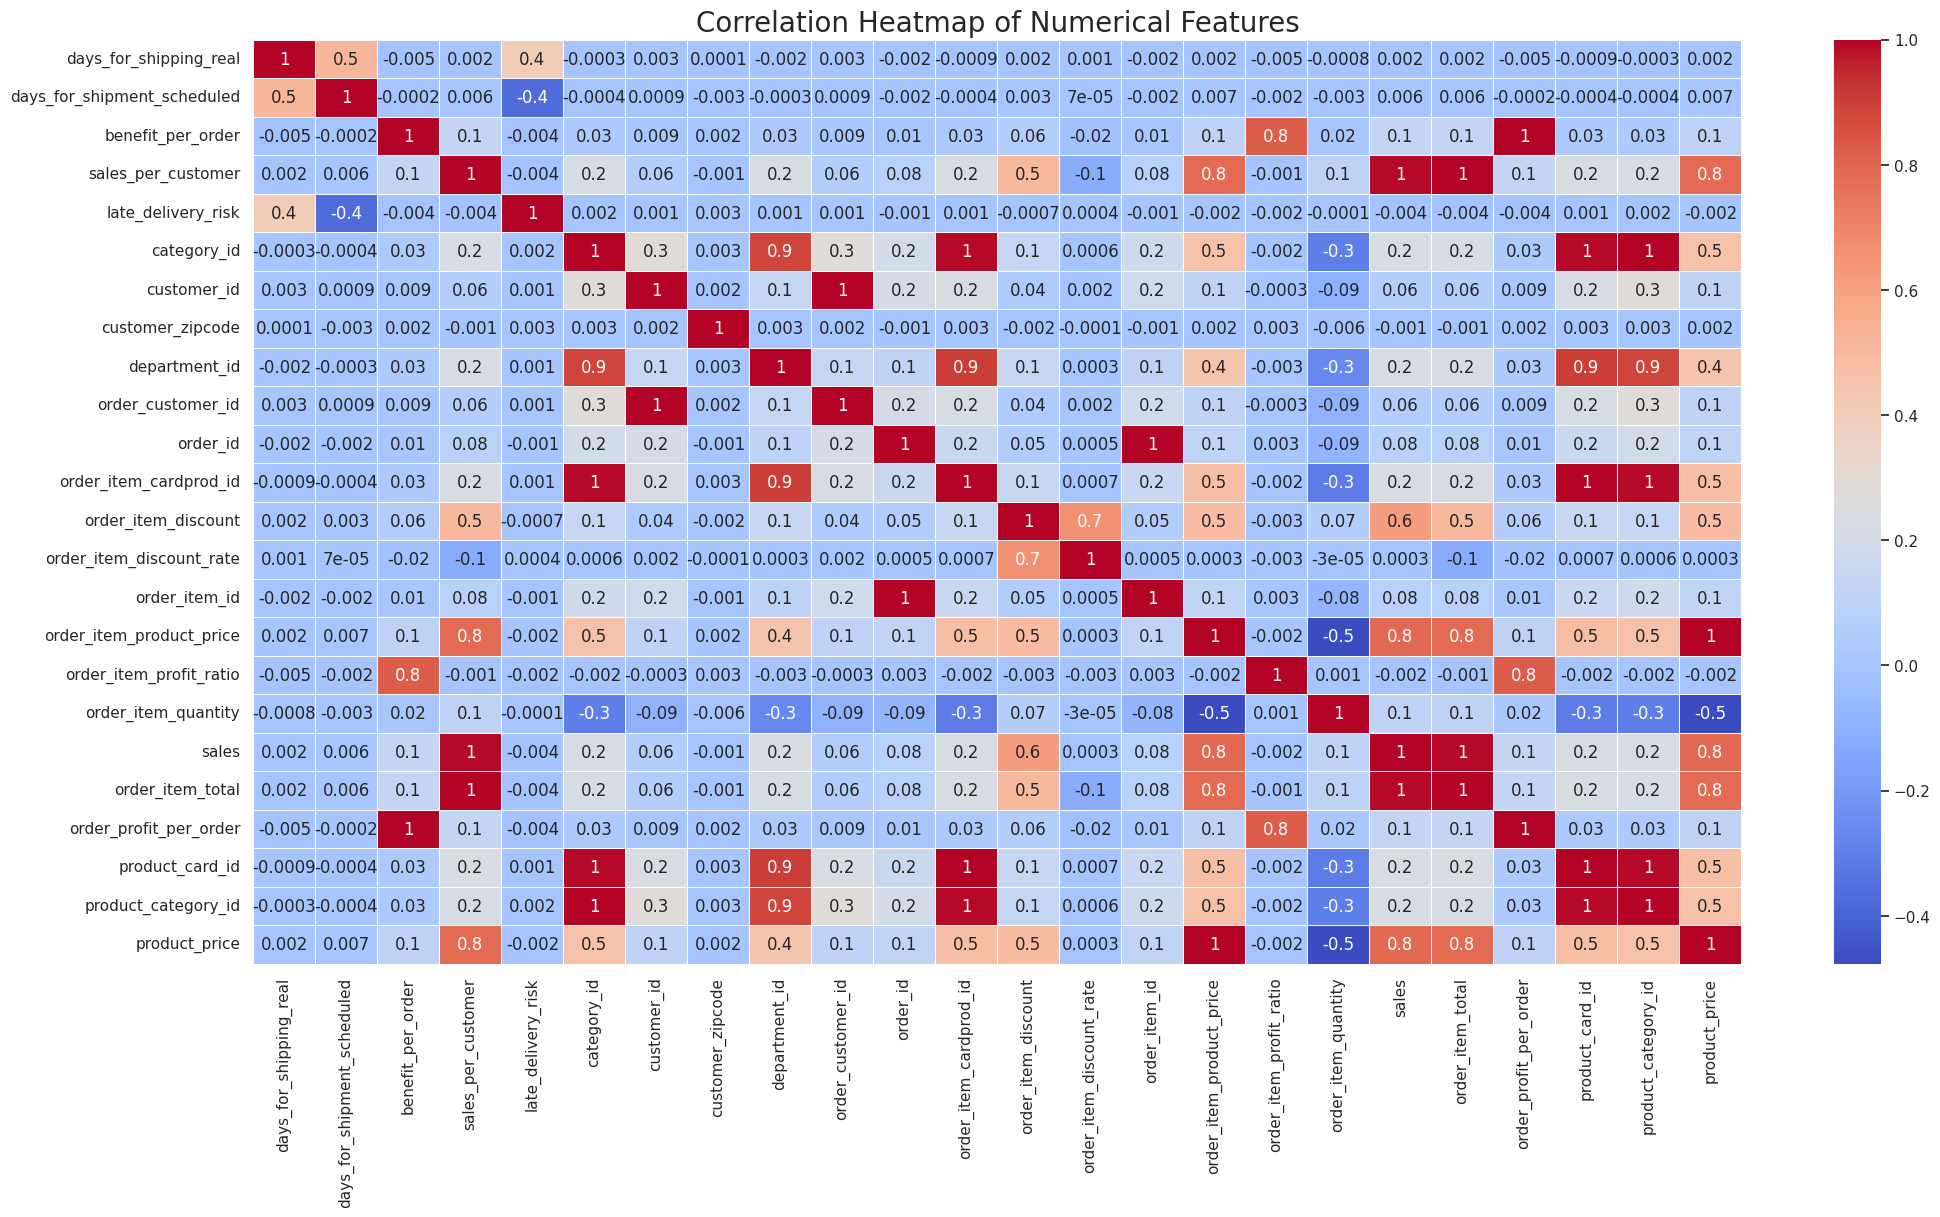

In [ ]:
#fig, ax = plt.subplots(figsize=(24,12))         # figsize
#sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(numeric_df.corr(),
            annot=True,
            linewidths=.5,
            fmt='.1g',
            cmap='coolwarm',
            ax=ax)

plt.title("Correlation Heatmap of Numerical Features", fontsize=20)
plt.show()

We can observe that product price price has high correlation with Sales,Order Item Total.

**Strong Positive Correlations (High Red Blocks)**

*  Sales, Sales per customer, Order Item Total, Order Profit per order, Benefit
per order, Product Price. These variables are highly correlated (~0.8–1.0), *essentially measuring the same thing.*

Example: Sales ≈ Order Item Total, and both align with Product Price.

*  Keeping all may cause multicollinearity → need dimensionality reduction or feature selection.

*  Category Id, Department Id, Product Card Id, Product Category Id have very strong correlation (~0.9+). These are hierarchical identifiers → only one should be retained (others are redundant).

**Strong Negative Correlations (High Blue Blocks)**

*  Order Item Quantity vs Product Price (~ –0.5). As price increases, order quantity decreases → intuitive demand relationship. This is useful as a predictor (could keep both).

*  Late_delivery_risk vs Days for shipment (scheduled) (~ –0.4). Longer scheduled days = lower late risk (makes sense: more time reduces late deliveries).

**Weak / Redundant Features**

*  Customer Id, Order Id, Order Item Id, Product Card Id are identifiers, not predictive hence should be dropped.

*  Zip Code, City, State, Full Name have very high cardinality and are not meaningful without aggregation hence candidates for dropping.

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

<Axes: title={'center': 'Total sales for all regions'}, xlabel='order_region'>

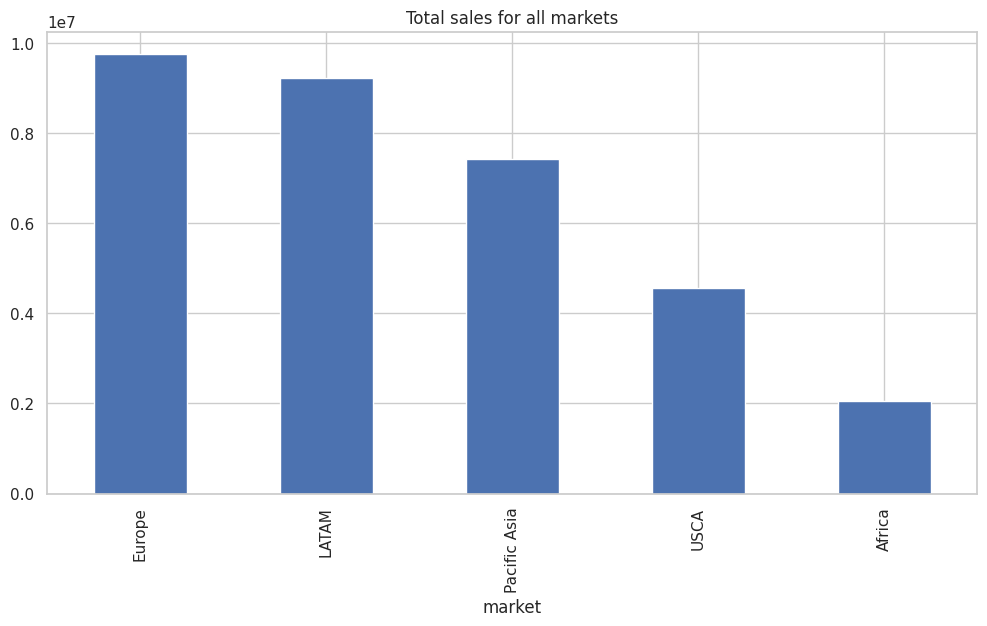

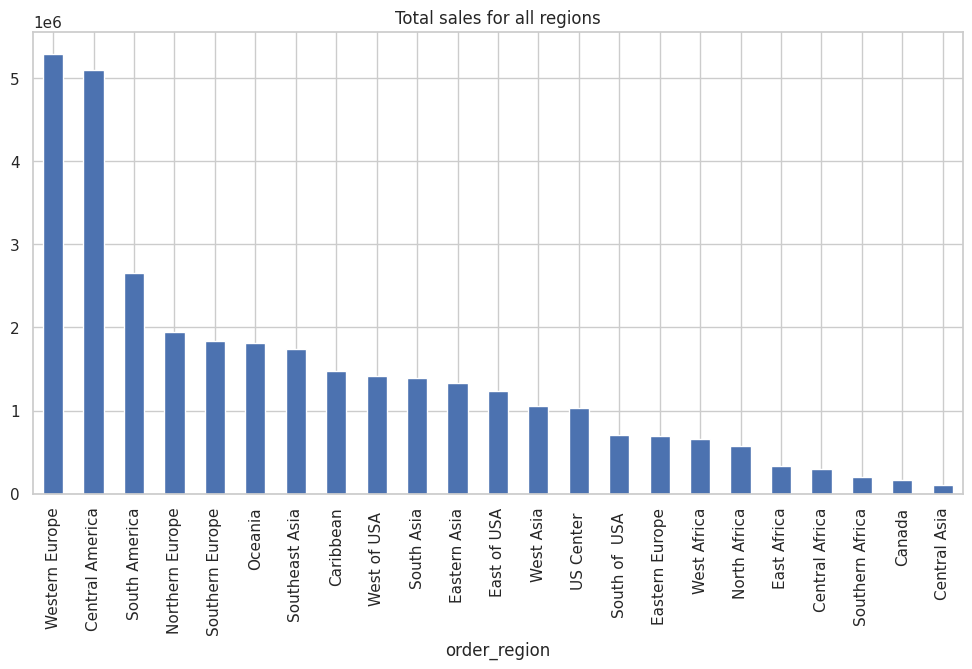

In [ ]:
market = df.groupby('market') #Grouping by market
region = df.groupby('order_region')
plt.figure(1)
market['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales.

Which catergory of products has highest sales?The same method can be followed here to see the product category with highest sales

<Axes: title={'center': 'Average price'}, xlabel='category_name'>

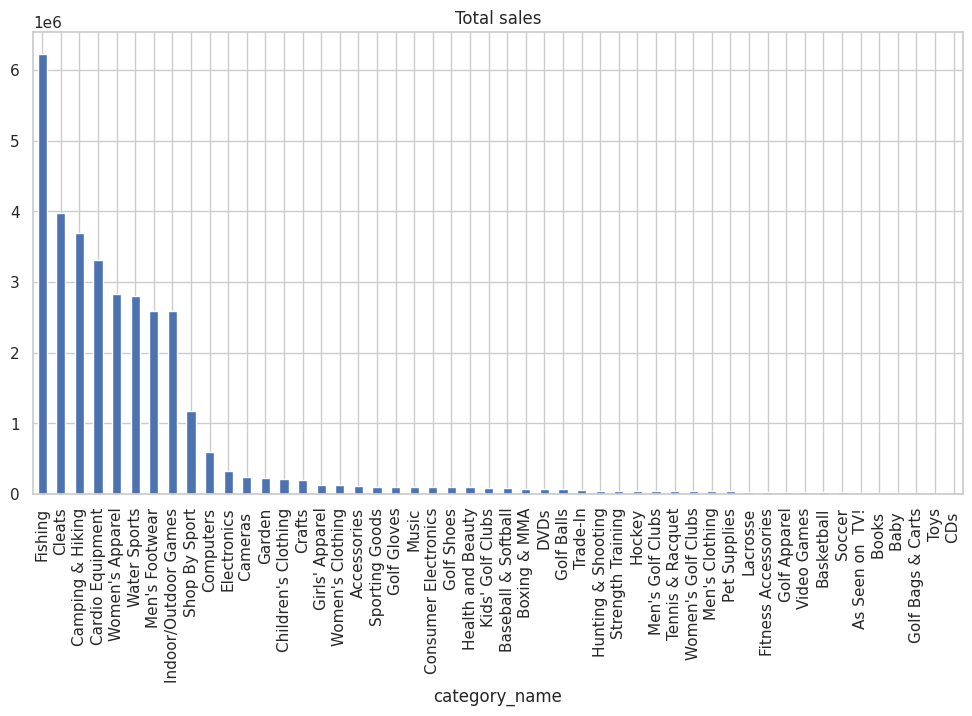

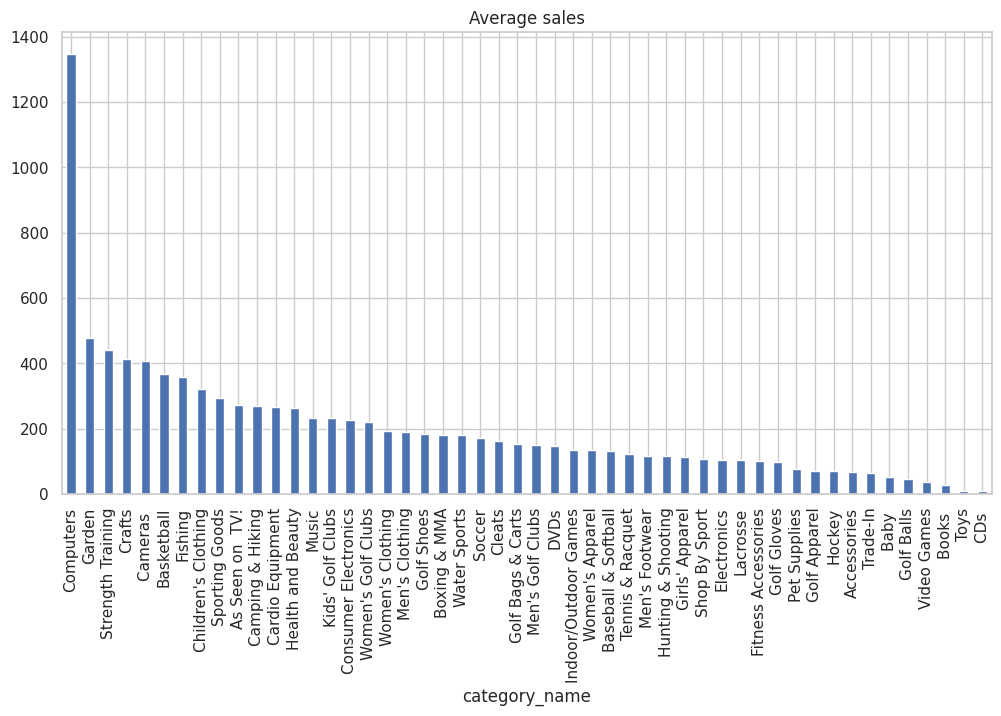

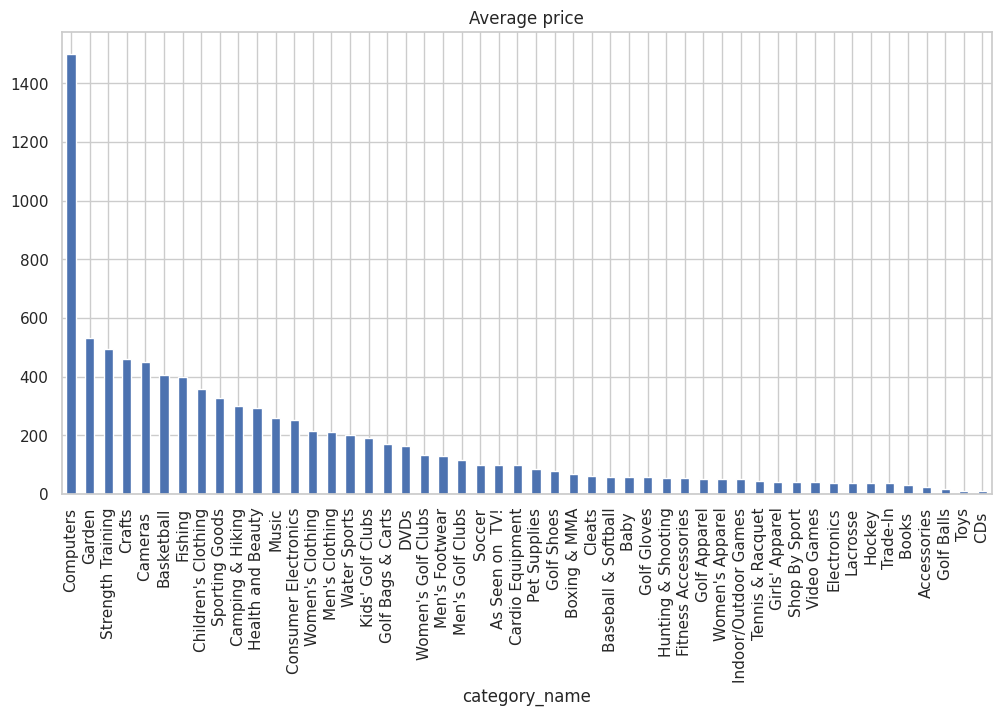

In [ ]:
#Grouping all categories
cat = df.groupby('category_name')
plt.figure(1)
# Total sum of sales for all categories
cat['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")





As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

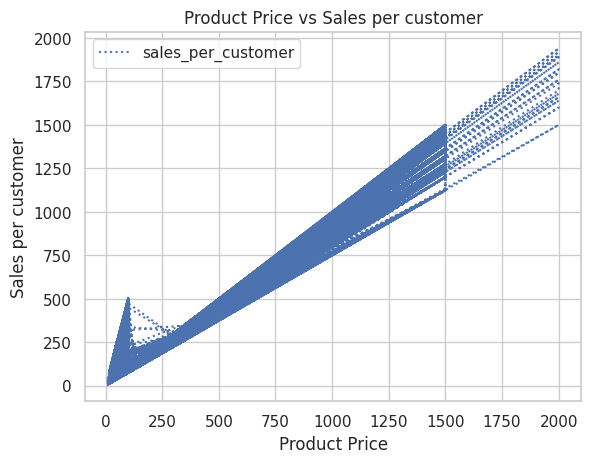

In [ ]:
df.plot(x='product_price', y='sales_per_customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12)
plt.title('Product Price vs Sales per customer')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales per customer') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales. Which quarter recorded highest sales? It can be found by dividing order time into years,months,week day,hour to better observe the trend.

In [ ]:
df['order_year']= pd.DatetimeIndex(df['order_date_dateorders']).year
df['order_month'] = pd.DatetimeIndex(df['order_date_dateorders']).month
df['order_week_day'] = pd.DatetimeIndex(df['order_date_dateorders']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order_date_dateorders']).hour
df['order_month_year'] = pd.to_datetime(df['order_date_dateorders']).dt.to_period('M')

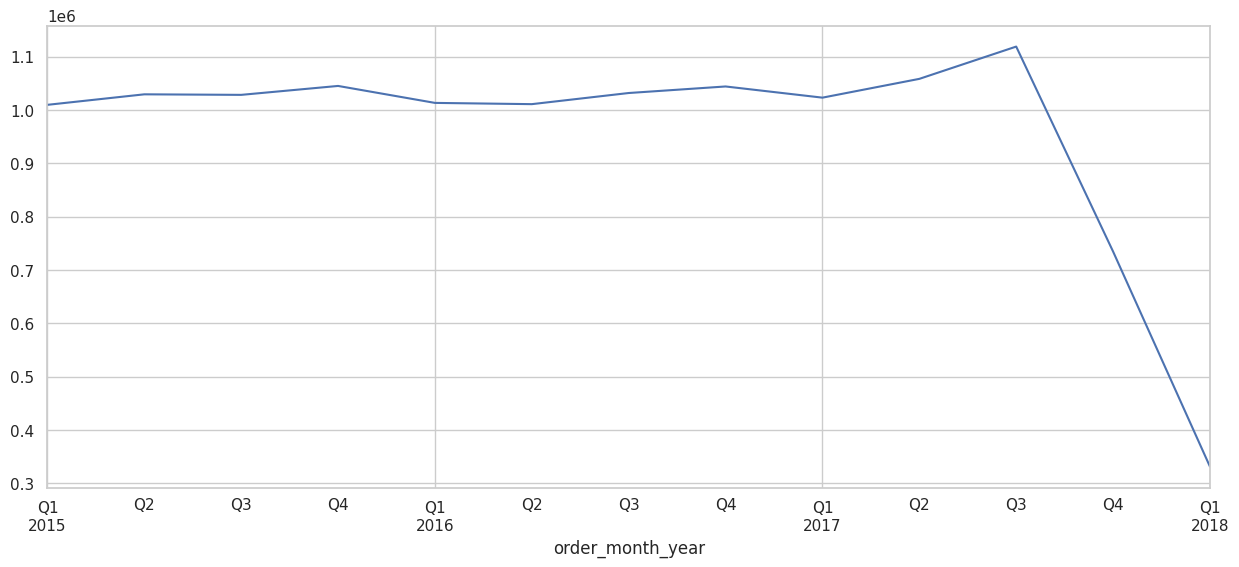

In [ ]:
quater= df.groupby('order_month_year')
quartersales=quater['sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. What is the purchase trend in week days,hours and months?

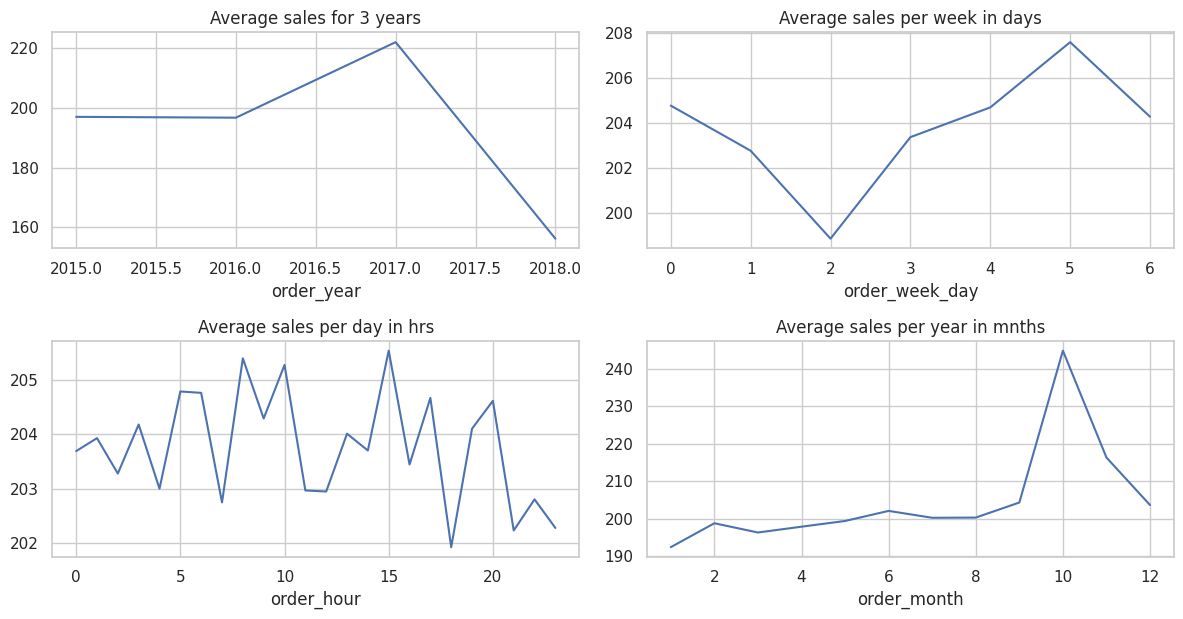

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= df.groupby('order_year')
quater['sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=df.groupby("order_week_day")
days['sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=df.groupby("order_hour")
hrs['sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=df.groupby("order_month")
mnth['sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

How price is impacting sales, when and which products are having more sales are found.The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [ ]:
df['type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

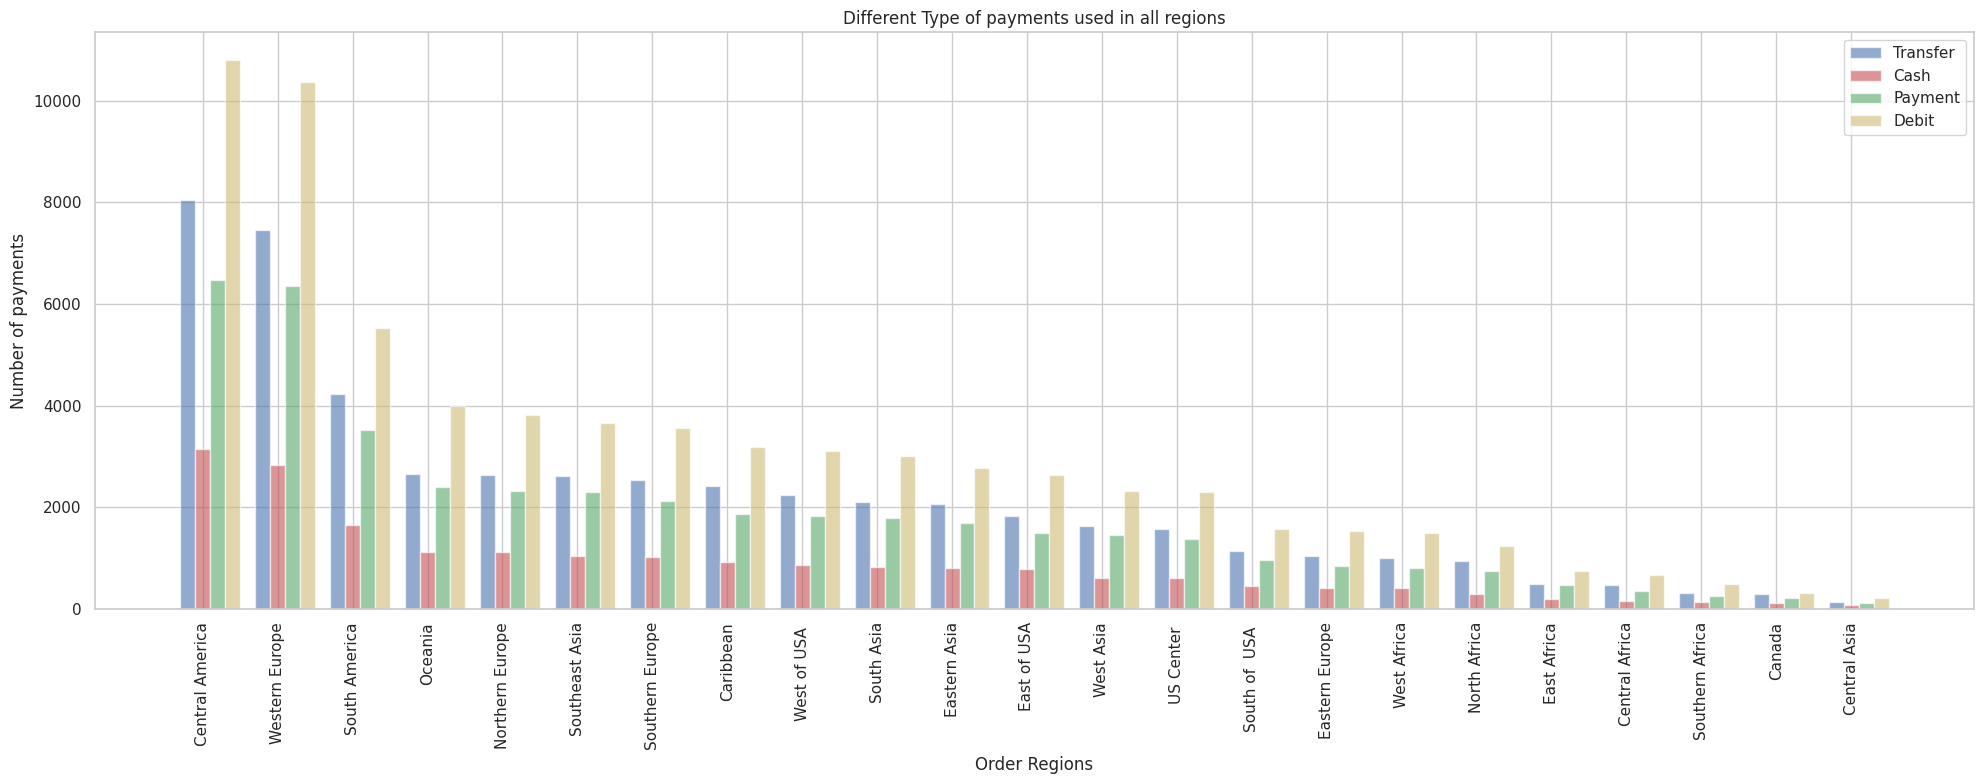

In [ ]:
#xyz = df.groupby('Type')
xyz1 = df[(df['type'] == 'TRANSFER')]
xyz2= df[(df['type'] == 'CASH')]
xyz3= df[(df['type'] == 'PAYMENT')]
xyz4= df[(df['type'] == 'DEBIT')]
count1=xyz1['order_region'].value_counts()
count2=xyz2['order_region'].value_counts()
count3=xyz3['order_region'].value_counts()
count4=xyz4['order_region'].value_counts()
names=df['order_region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. Which products are these?

Total revenue lost with orders -3883547.345768667


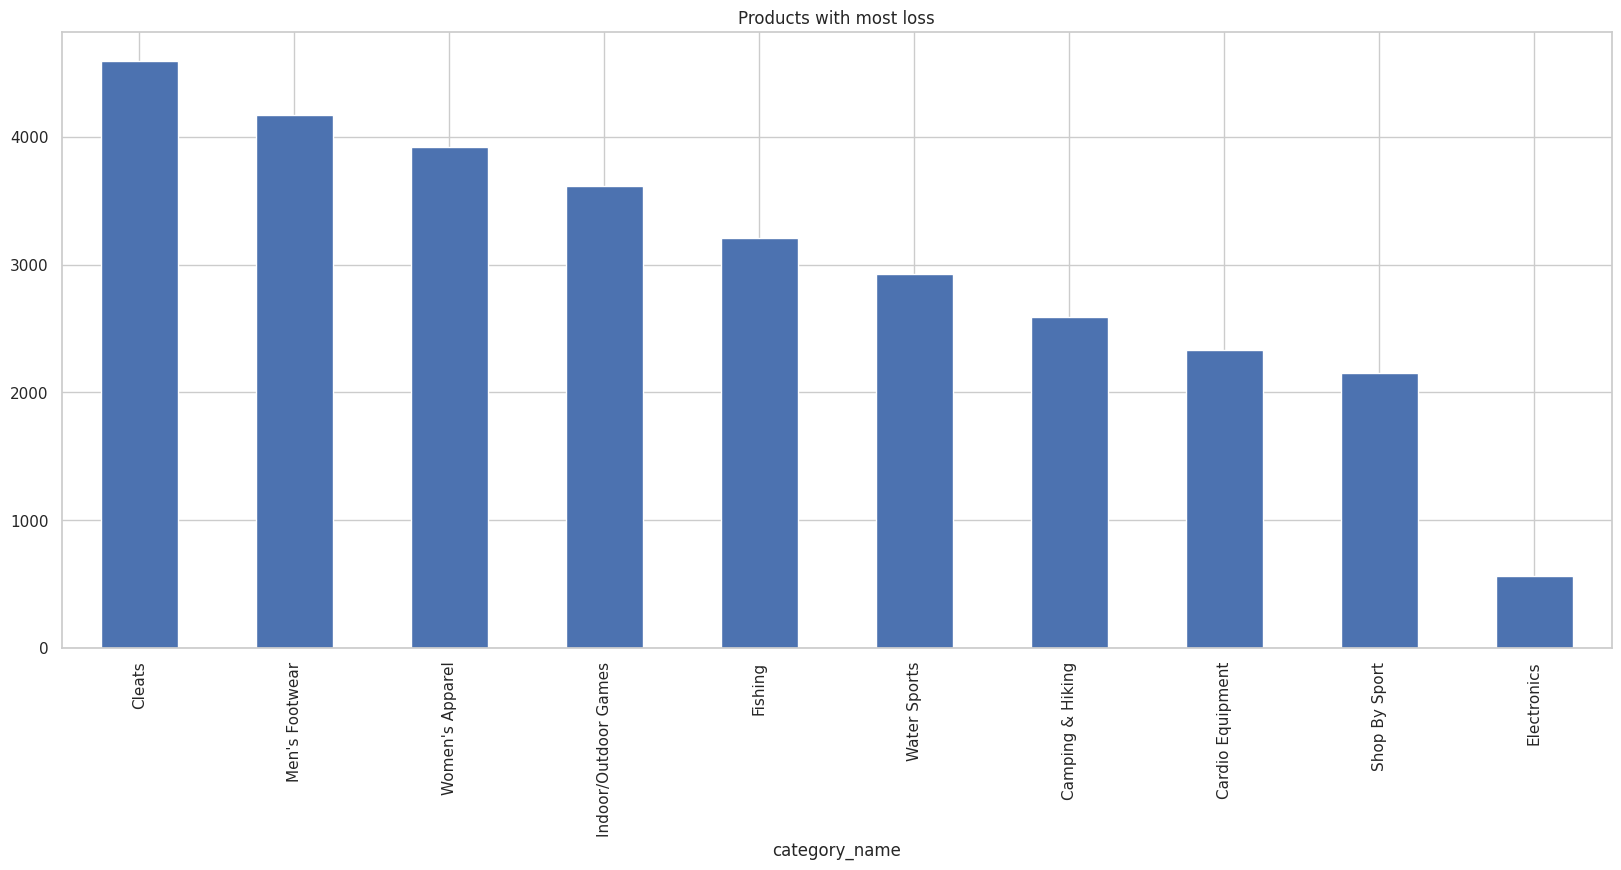

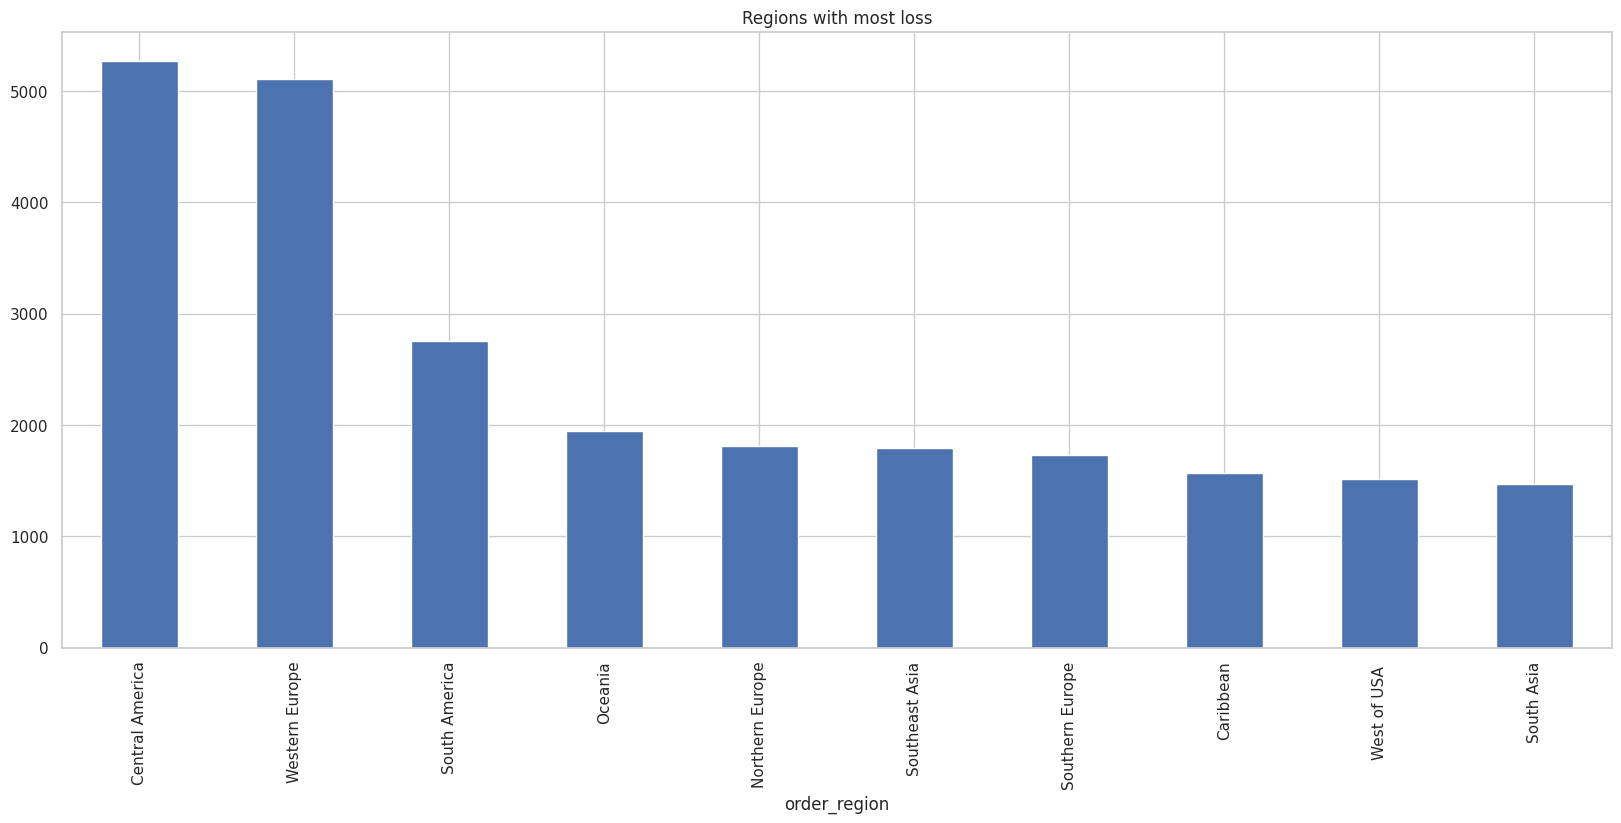

In [ ]:
loss = df[(df['benefit_per_order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['benefit_per_order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future


In [ ]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = df[(df['type'] != 'TRANSFER')&(df['order_status'] == 'SUSPECTED_FRAUD')]
xyz['order_region'].value_counts()

,count
order_region,


It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most?

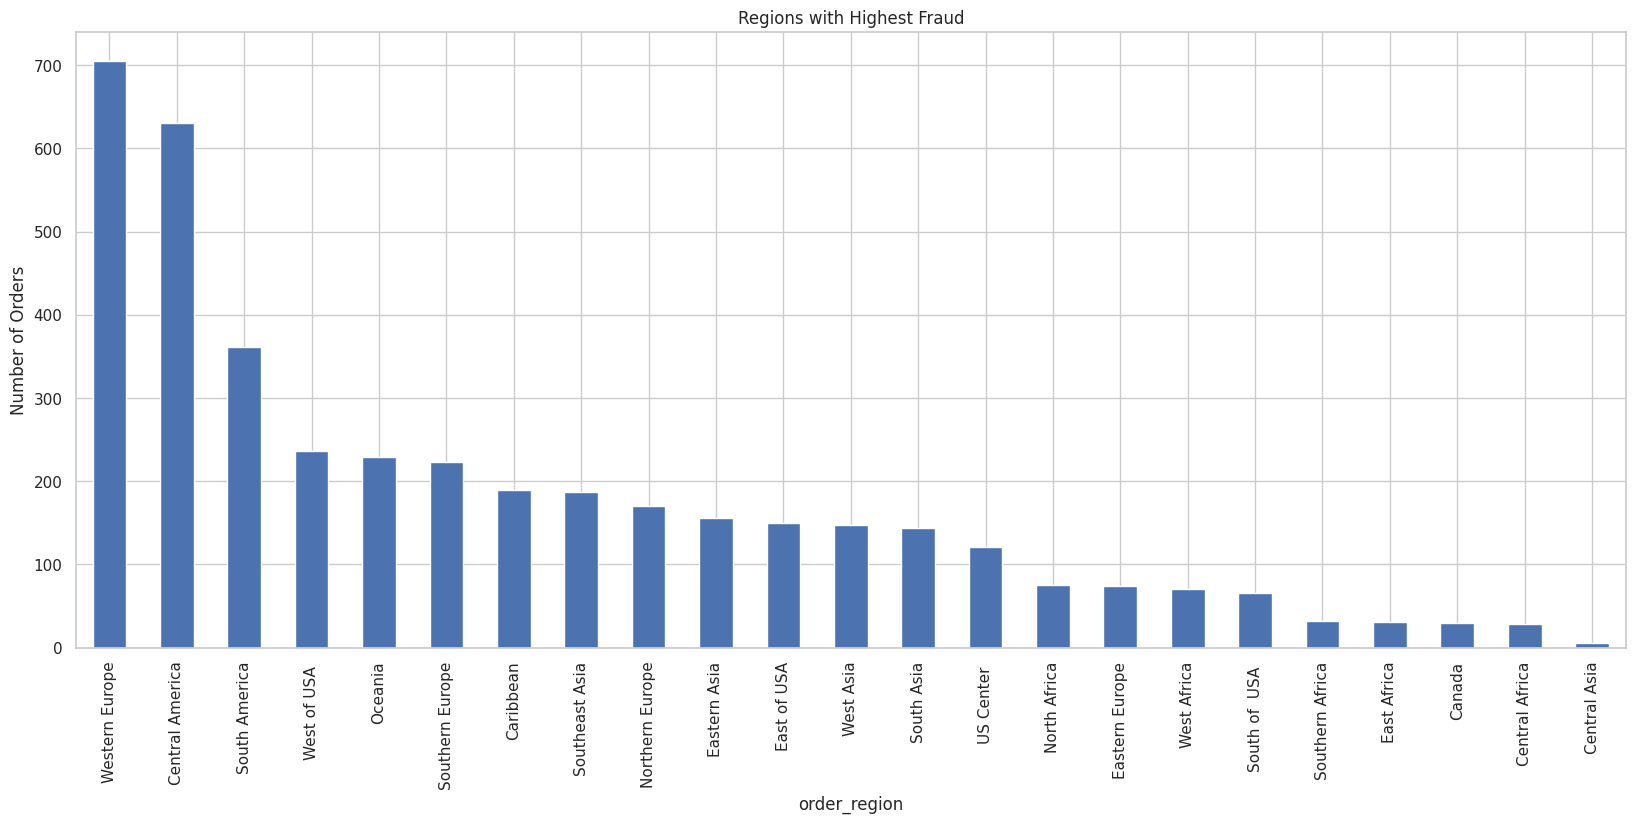

In [ ]:
high_fraud = df[(df['order_status'] == 'SUSPECTED_FRAUD') & (df['type'] == 'TRANSFER')]#separating orders with suspected fraud
# Plotting bar chart with respect to order region
high_fraud['order_region'].value_counts().plot.bar(figsize=(20,8), title="Regions with Highest Fraud")
plt.xlabel("order_region")
plt.ylabel("Number of Orders")
plt.show()

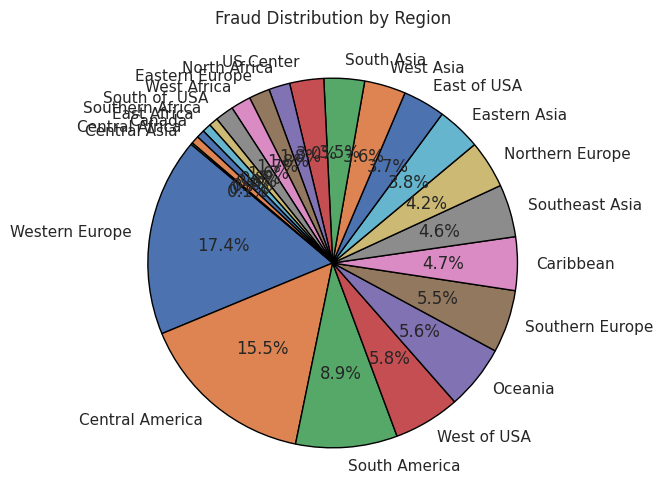

In [ ]:
# 1. Filter the dataset for suspected fraud orders where type is TRANSFER
high_fraud = df[(df['order_status'] == 'SUSPECTED_FRAUD') & (df['type'] == 'TRANSFER')]

# 2. Count the number of fraud cases by region
fraud_counts = high_fraud['order_region'].value_counts()

# 3. Plot a pie chart
plt.figure(figsize=(10, 6))   # set chart size
plt.pie(
    fraud_counts,
    labels=fraud_counts.index,   # region names
    autopct='%1.1f%%',           # show percentages
    startangle=140,              # rotate start angle for better view
    wedgeprops={'edgecolor':'black'}  # add borders for clarity
)

plt.title("Fraud Distribution by Region")
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?


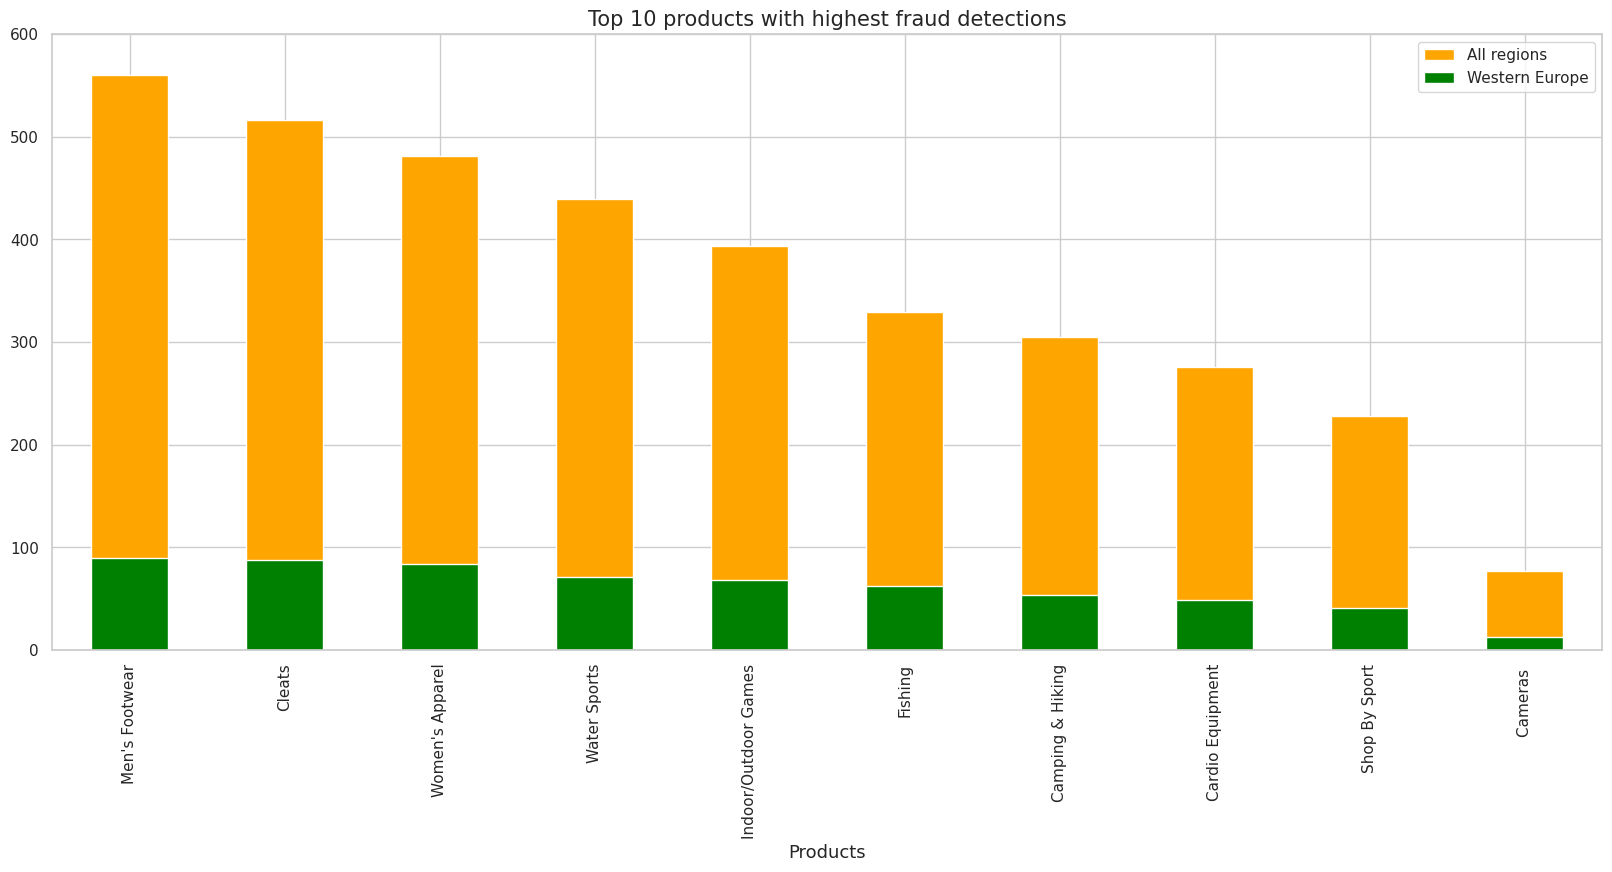

In [ ]:
# Filter the dataframe to include only rows where 'Order Status' is 'SUSPECTED_FRAUD'and store it in a new dataframe called high_fraud1
high_fraud1 = df[(df['order_status'] == 'SUSPECTED_FRAUD')] #

# Filter the dataframe further to include only rows where 'Order Status' is 'SUSPECTED_FRAUD'
# and 'Order Region' is 'Western Europe', storing it in high_fraud2
high_fraud2 = df[(df['order_status'] == 'SUSPECTED_FRAUD') &(df['order_region'] == 'Western Europe')]

# Create a bar plot for the top 10 most frequent 'Category Name' in the high_fraud1 dataframe (all regions)
# Use orange bars and set the title of the plot
fraud1=high_fraud1['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')

# Create a bar plot for the top 10 most frequent 'Category Name' in the high_fraud2 dataframe (Western Europe)
# Use green bars and set the title of the plot
fraud2=high_fraud2['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')

# Add a legend to the plot to distinguish between "All regions" and "Western Europe" bars
plt.legend(["All regions", "Western Europe"])

# Set the main title of the entire plot
plt.title("Top 10 products with highest fraud detections", size=15)

# Set the label for the x-axis
plt.xlabel("Products", size=13)

# Set the limits for the y-axis, from 0 to 600
plt.ylim(0,600)

# Display the plot
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?

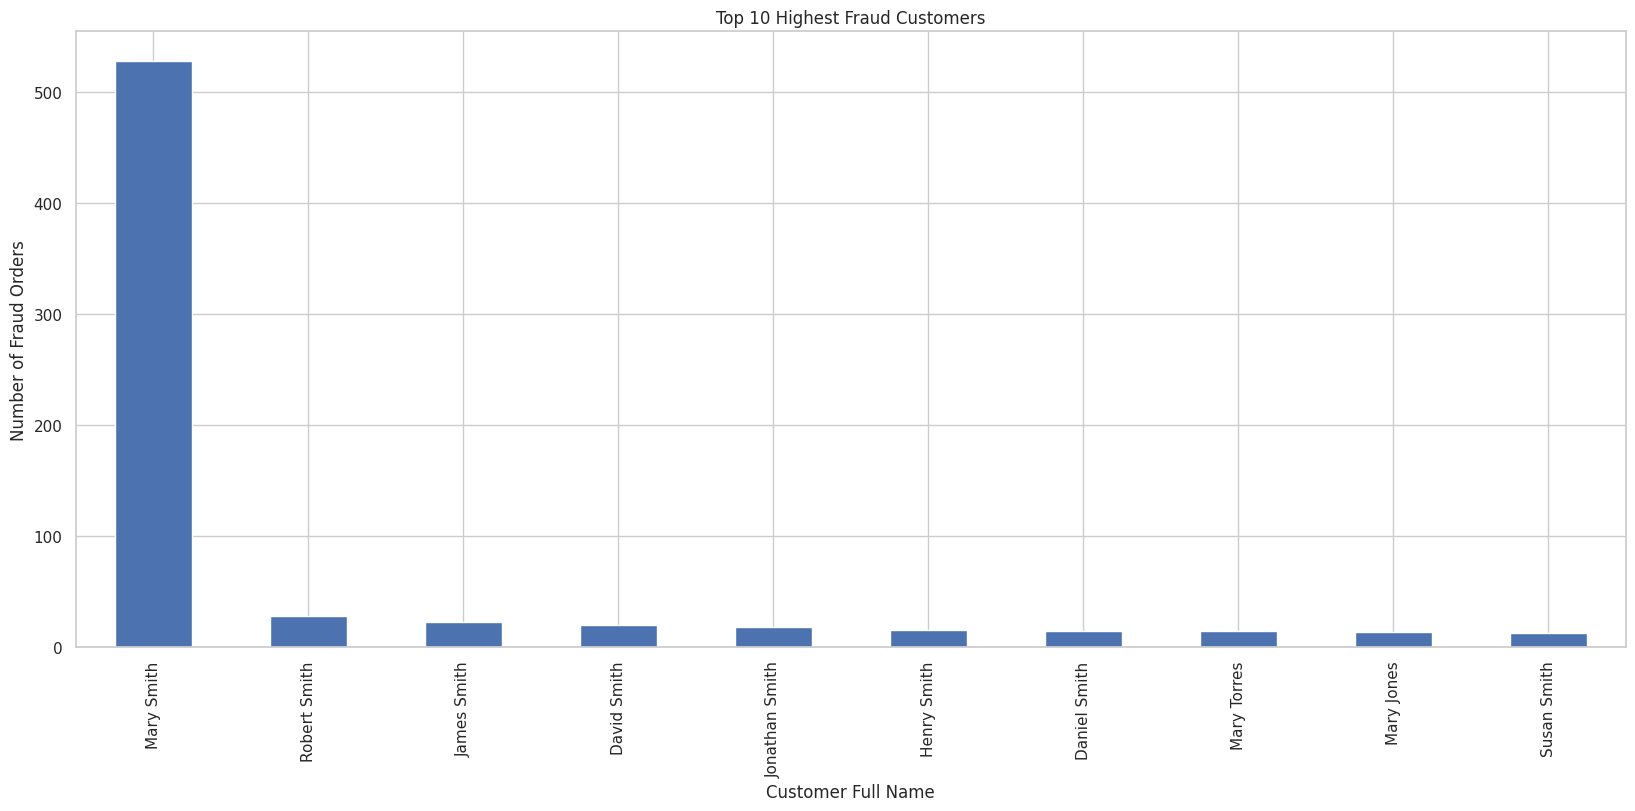

In [ ]:
#Filtering out suspected fruad orders
cus = df[(df['order_status'] == 'SUSPECTED_FRAUD')]
#Top 10 customers with most fraud
cus['customer_full_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")
plt.xlabel("Customer Full Name") # Add x-axis label
plt.ylabel("Number of Fraud Orders") # Add y-axis label
plt.show() # Display the plot

The customer named Mary Smith alone was responible for trying to conduct fraud 528 times which is very shocking .How much amount exactly did she conduct fraud orders?

In [ ]:
#Filtering orders of mary smith with suspected fraud
# Correcting the customer's full name to include a space
amount = df[(df['customer_full_name'] == 'Mary Smith')&(df['order_status'] == 'SUSPECTED_FRAUD')]
#Plotting bar chart for top 10 most suspected fraud customers
total_fraud_sales_mary_smith = amount['sales'].sum()

# Print the total amount of fraud sales by Mary Smith
print(f"Total sales amount for suspected fraud orders by Mary Smith: {total_fraud_sales_mary_smith:.2f}")

Total sales amount for suspected fraud orders by Mary Smith: 102491.66


The total amount was almost 102k which is very huge amount.Since Mary was using different address every time when placing orders, a new customer id was issued each time which makes it difficult to identify the customer and ban them. All these parameters should be taken into consideration to improve fraud detection algorithm so fraud can be identified more accurately.

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What category of products are being delivered late the most?

<Axes: title={'center': 'Top 10 products with most late deliveries'}, xlabel='category_name'>

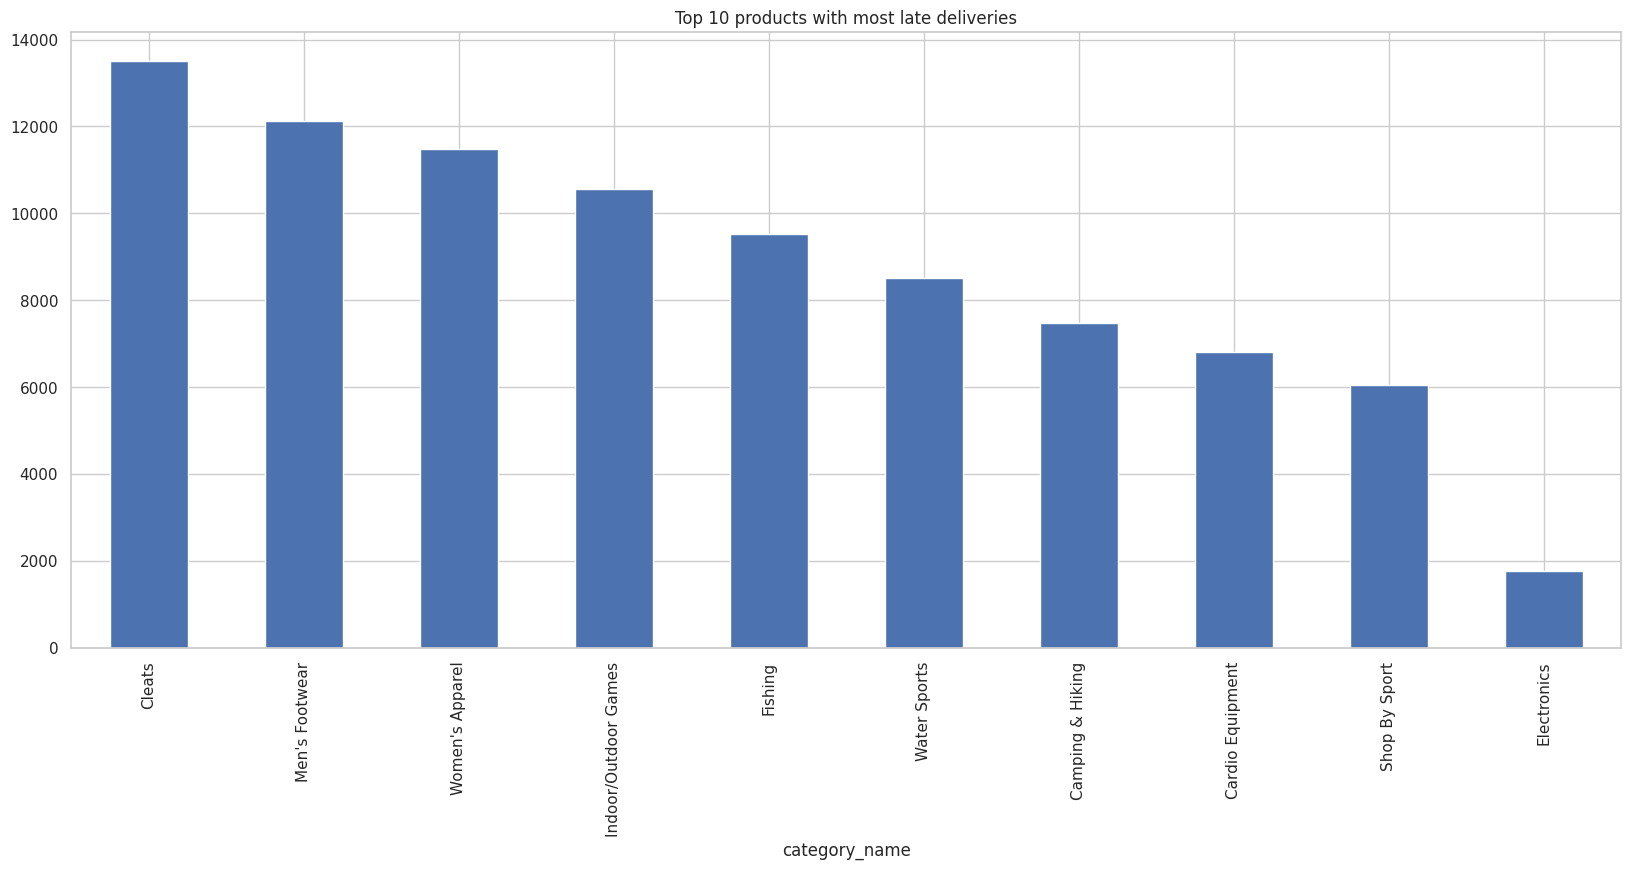

In [ ]:
#Filtering columns with late delivery status
late_delivery = df[(df['delivery_status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")


It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products.

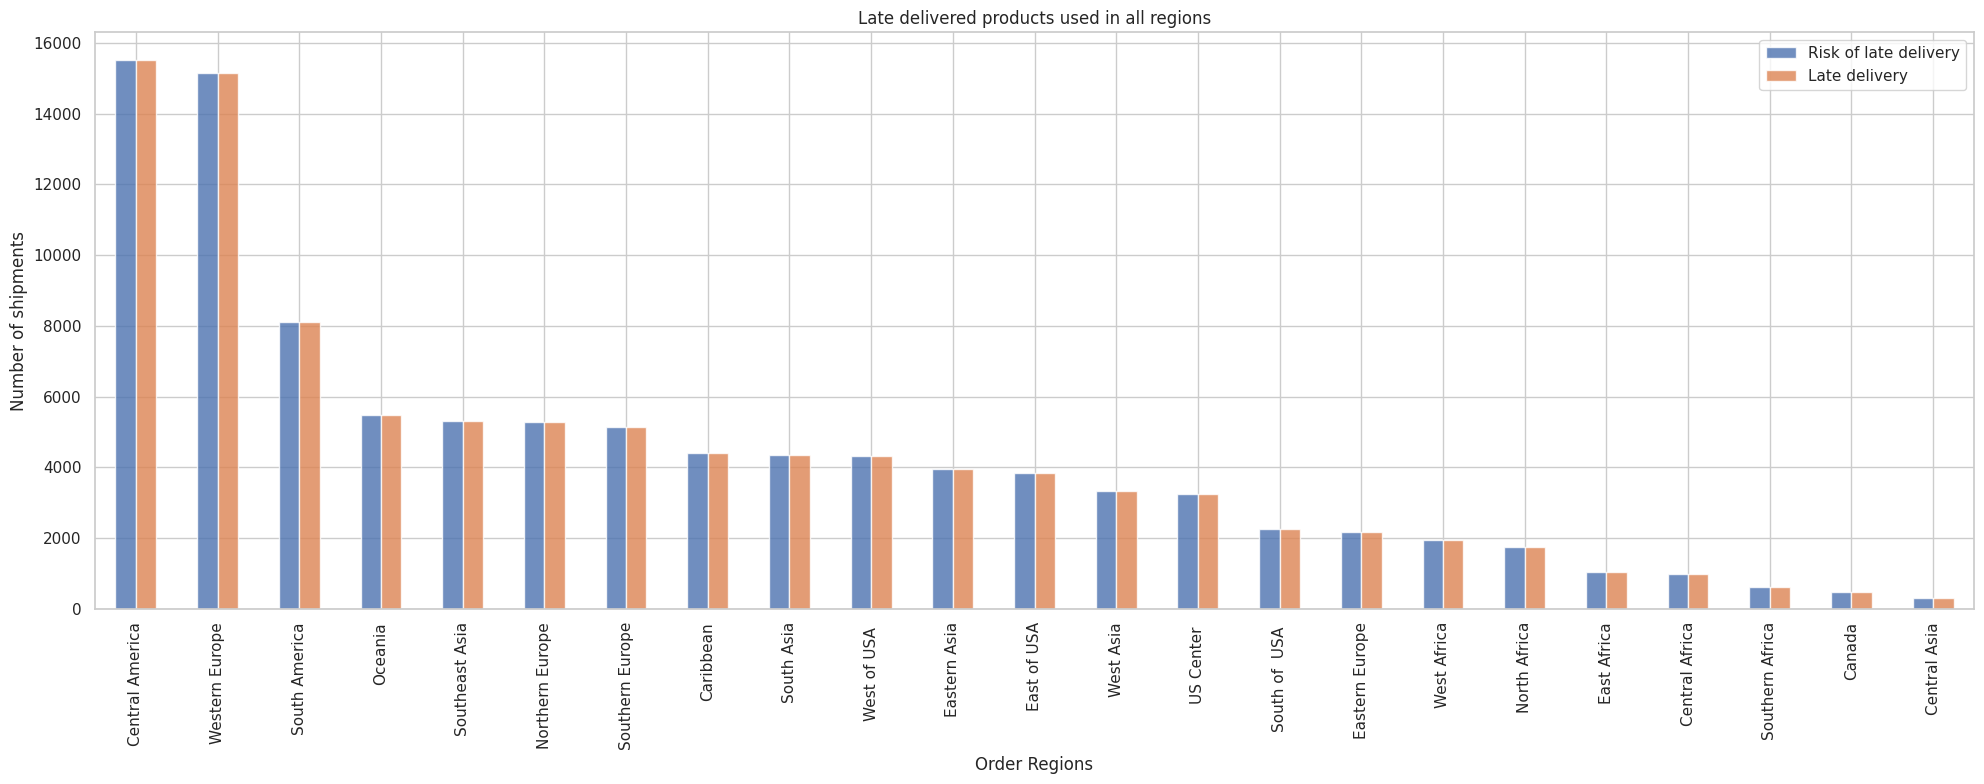

In [ ]:
# Count the occurrences of each order region for orders with late delivery risk and late delivered orders
count1 = df[df['late_delivery_risk'] == 1]['order_region'].value_counts()
count2 = df[df['delivery_status'] == 'Late delivery']['order_region'].value_counts()

# Combine the counts into a single dataframe for easier plotting
late_delivery_counts = pd.DataFrame({'Risk of late delivery': count1, 'Late delivery': count2}).fillna(0)

# Plot the bar chart using pandas plot function
late_delivery_counts.plot(kind='bar', figsize=(20,8), alpha=0.8)
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

In [ ]:
display("\nData types:\n", df.dtypes)

'\nData types:\n'

,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


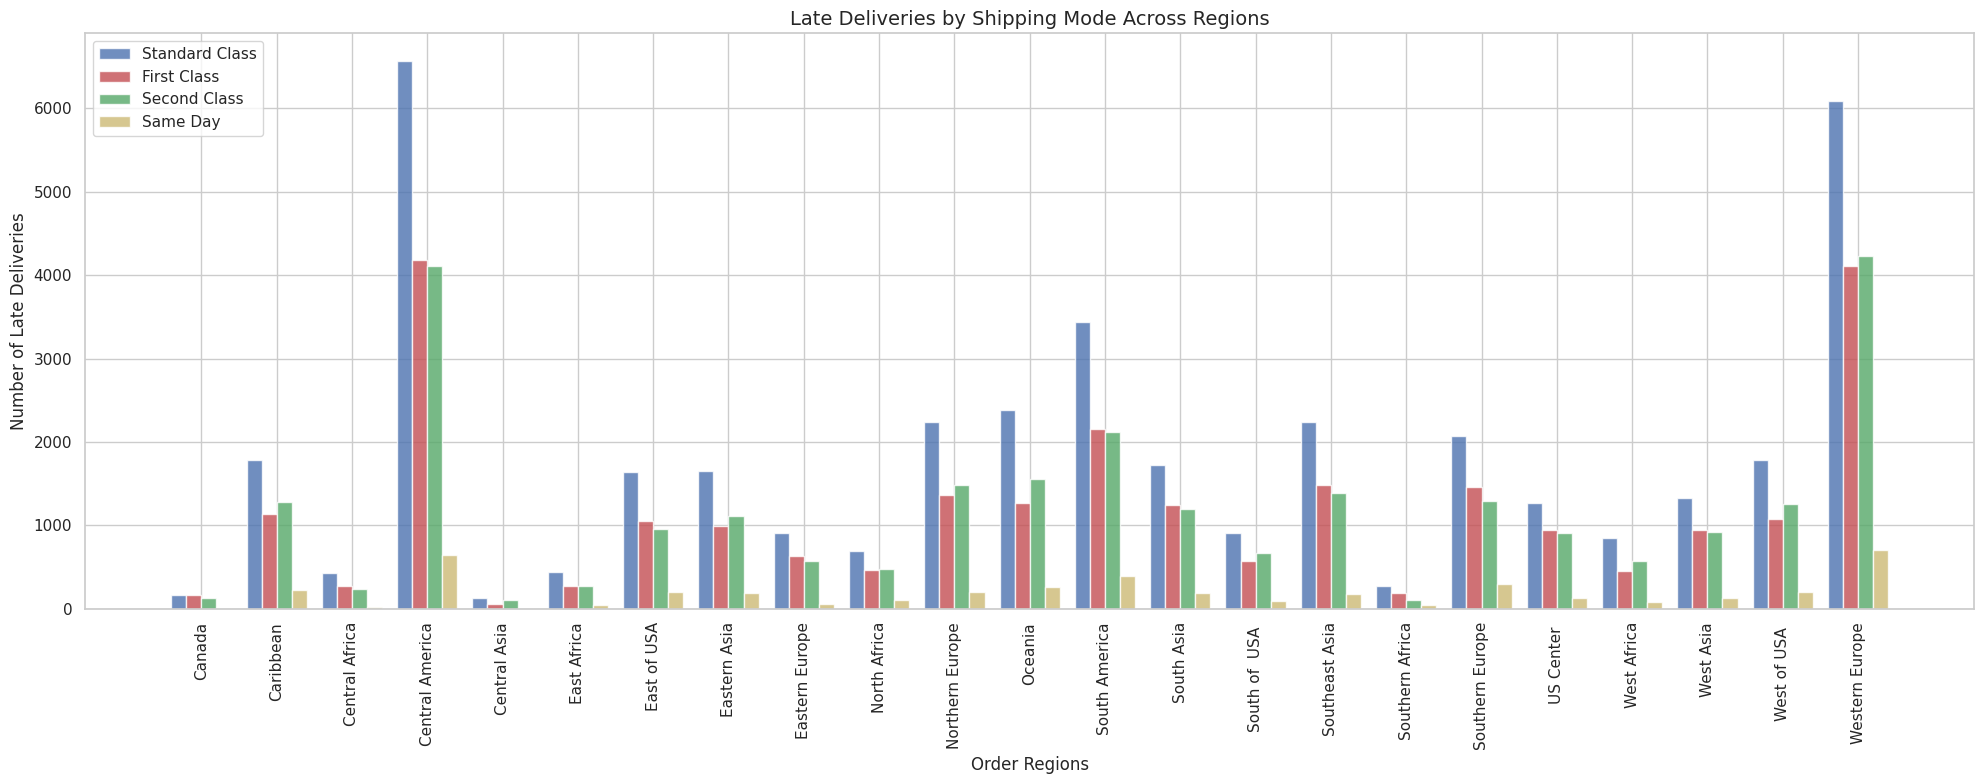

In [ ]:

# Filtering late delivery orders by shipping mode
xyz1 = df[(df['delivery_status'].str.lower() == 'late delivery') & (df['shipping_mode'].str.lower() == 'standard class')]
xyz2 = df[(df['delivery_status'].str.lower() == 'late delivery') & (df['shipping_mode'].str.lower() == 'first class')]
xyz3 = df[(df['delivery_status'].str.lower() == 'late delivery') & (df['shipping_mode'].str.lower() == 'second class')]
xyz4 = df[(df['delivery_status'].str.lower() == 'late delivery') & (df['shipping_mode'].str.lower() == 'same day')]


# Counting late deliveries by region for each shipping mode

count1 = xyz1['order_region'].value_counts()
count2 = xyz2['order_region'].value_counts()
count3 = xyz3['order_region'].value_counts()
count4 = xyz4['order_region'].value_counts()


# Combine all region names for consistent plotting

regions = sorted(set(count1.index) | set(count2.index) | set(count3.index) | set(count4.index))
n_groups = len(regions)

# Align counts (fill missing regions with 0)
c1 = [count1.get(r, 0) for r in regions]
c2 = [count2.get(r, 0) for r in regions]
c3 = [count3.get(r, 0) for r in regions]
c4 = [count4.get(r, 0) for r in regions]


# Plot grouped bar chart

fig, ax = plt.subplots(figsize=(20, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

plt.bar(index, c1, bar_width, alpha=opacity, color='b', label='Standard Class')
plt.bar(index + bar_width, c2, bar_width, alpha=opacity, color='r', label='First Class')
plt.bar(index + 2*bar_width, c3, bar_width, alpha=opacity, color='g', label='Second Class')
plt.bar(index + 3*bar_width, c4, bar_width, alpha=opacity, color='y', label='Same Day')

plt.xlabel('Order Regions', fontsize=12)
plt.ylabel('Number of Late Deliveries', fontsize=12)
plt.title('Late Deliveries by Shipping Mode Across Regions', fontsize=14)
plt.xticks(index + 1.5*bar_width, regions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Data Modelling**

To measure the performance of different models the machine learning models are trained to detect fraud,late delivery for classification type. And sales, order quantity is predicted for regression type models.

A new dataset is created with the copy of original data for training the data and validation.

In [ ]:
train_data=df.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better to predict if an order is fraudulent or will be delivered late.

In [ ]:
train_data['fraud'] = np.where(train_data['order_status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['delivery_status'] == 'Late delivery', 1, 0)

In [ ]:
#quick check
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,shipping_date_dateorders,shipping_mode,customer_full_name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,...,2018-02-03 22:56:00,Standard Class,Cally Holloway,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,...,2018-01-18 12:27:00,Standard Class,Irene Luna,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,...,2018-01-17 12:06:00,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,...,2018-01-16 11:45:00,Standard Class,Tana Tate,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,2018-01-15 11:24:00,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,0,0


Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [ ]:
#Dropping columns with repeated values
# Check which columns exist before dropping
cols_to_drop = ['delivery_status','late_delivery_risk','order_status','order_month_year','order_date_dateorders']
existing_cols_to_drop = [col for col in cols_to_drop if col in train_data.columns]

train_data.drop(existing_cols_to_drop, axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [ ]:
train_data.dtypes

,0
type,int64
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
category_id,int64
category_name,int64
customer_city,object
customer_country,int64
customer_id,int64


There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['customer_country']  = le.fit_transform(train_data['customer_country'])
train_data['market']            = le.fit_transform(train_data['market'])
train_data['type']              = le.fit_transform(train_data['type'])
train_data['product_name']      = le.fit_transform(train_data['product_name'])
train_data['customer_segment']  = le.fit_transform(train_data['customer_segment'])
train_data['customer_state']    = le.fit_transform(train_data['customer_state'])
train_data['order_region']      = le.fit_transform(train_data['order_region'])
train_data['order_city']        = le.fit_transform(train_data['order_city'])
train_data['category_name']     = le.fit_transform(train_data['category_name'])
train_data['Customer City']     = le.fit_transform(train_data['customer_city'])
train_data['department_name']   = le.fit_transform(train_data['department_name'])
train_data['order_state']       = le.fit_transform(train_data['order_state'])
train_data['shipping_mode']     = le.fit_transform(train_data['shipping_mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['order_country']     = le.fit_transform(train_data['order_country'])
train_data['customer_full_name']= le.fit_transform(train_data['customer_full_name'])

#display the initial records
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,shipping_date_dateorders,shipping_mode,customer_full_name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery,Customer City
0,1,3,4,91.25,314.64,73,40,Caguas,1,20755,...,2018-02-03 22:56:00,3,1876,2018,1,2,22,0,0,66
1,3,5,4,-249.09,311.36,73,40,Caguas,1,19492,...,2018-01-18 12:27:00,3,5378,2018,1,5,12,0,1,66
2,0,4,4,-247.78,309.72,73,40,San Jose,0,19491,...,2018-01-17 12:06:00,3,4429,2018,1,5,12,0,0,452
3,1,3,4,22.86,304.81,73,40,Los Angeles,0,19490,...,2018-01-16 11:45:00,3,12929,2018,1,5,11,0,0,285
4,2,2,4,134.21,298.25,73,40,Caguas,1,19489,...,2018-01-15 11:24:00,3,10638,2018,1,5,11,0,0,66


Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data.

## Comparision of Classification Models

In [ ]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [ ]:
# Define columns to drop before scaling (date columns and any other non-numeric that might remain)
cols_to_drop_for_scaling = ['shipping_date_dateorders'] # Removed 'order_date_dateorders' as it was dropped earlier

# Drop date columns from the dataframes before scaling
xf_train_numeric = xf_train.drop(columns=cols_to_drop_for_scaling, errors='ignore').select_dtypes(include=np.number)
xf_test_numeric = xf_test.drop(columns=cols_to_drop_for_scaling, errors='ignore').select_dtypes(include=np.number)
xl_train_numeric = xl_train.drop(columns=cols_to_drop_for_scaling, errors='ignore').select_dtypes(include=np.number)
xl_test_numeric = xl_test.drop(columns=cols_to_drop_for_scaling, errors='ignore').select_dtypes(include=np.number)


sc = StandardScaler()
xf_train_scaled=sc.fit_transform(xf_train_numeric)
xf_test_scaled=sc.transform(xf_test_numeric)
xl_train_scaled=sc.fit_transform(xl_train_numeric)
xl_test_scaled=sc.transform(xl_test_numeric)

print("Scaling complete.")
print("Shape of xf_train_scaled:", xf_train_scaled.shape)
print("Shape of xf_test_scaled:", xf_test_scaled.shape)
print("Shape of xl_train_scaled:", xl_train_scaled.shape)
print("Shape of xl_test_scaled:", xl_test_scaled.shape)

Scaling complete.
Shape of xf_train_scaled: (144415, 43)
Shape of xf_test_scaled: (36104, 43)
Shape of xl_train_scaled: (144415, 43)
Shape of xl_test_scaled: (36104, 43)


The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics.

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

In [ ]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

# ***Base Model*** -Logistic Regression - Classification model

In [ ]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is        : 97.77033015732329 %
Recall score of fraud status is        : 57.18849840255591 %
Conf Matrix of fraud status is        :
 [[35120   134]
 [  671   179]]
F1 score of fraud status is        : 30.782459157351678 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


# Other Classification models and comparision

## Gaussian naive bayes model

In [ ]:
model_f = GaussianNB()
model_l = GaussianNB()
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : GaussianNB()
Accuracy of fraud status is        : 87.84899180146243 %
Recall score of fraud status is        : 16.23066641206798 %
Conf Matrix of fraud status is        :
 [[30867  4387]
 [    0   850]]
F1 score of fraud status is        : 27.928371940200424 %
Accuracy of late delivery status is: 57.27066253046754 %
Recall score of late delivery status is: 56.20386144236229 %
Conf Matrix of late delivery status is: 
 [[  882 15425]
 [    2 19795]]
F1 score of late delivery status is: 71.95957613101405 %


## Support vector machines

In [ ]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : LinearSVC()
Accuracy of fraud status is        : 97.76756038112121 %
Recall score of fraud status is        : 57.58620689655173 %
Conf Matrix of fraud status is        :
 [[35131   123]
 [  683   167]]
F1 score of fraud status is        : 29.29824561403509 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


## K nearest Neighbors classification

In [ ]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is        : 97.41025925105251 %
Recall score of fraud status is        : 43.390357698289264 %
Conf Matrix of fraud status is        :
 [[34890   364]
 [  571   279]]
F1 score of fraud status is        : 37.374413931681175 %
Accuracy of late delivery status is: 80.9522490582761 %
Recall score of late delivery status is: 83.45763414128858 %
Conf Matrix of late delivery status is: 
 [[13113  3194]
 [ 3683 16114]]
F1 score of late delivery status is: 82.41401355325407 %


## Random forest classification

In [ ]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is        : 98.80622645690228 %
Recall score of fraud status is        : 98.60788863109049 %
Conf Matrix of fraud status is        :
 [[35248     6]
 [  425   425]]
F1 score of fraud status is        : 66.35441061670569 %
Accuracy of late delivery status is: 98.13040106359406 %
Recall score of late delivery status is: 96.70281359906213 %
Conf Matrix of late delivery status is: 
 [[15632   675]
 [    0 19797]]
F1 score of late delivery status is: 98.32377262906951 %


## Extra trees classification

In [ ]:
model_f = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
model_l = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : ExtraTreesClassifier(random_state=0)
Accuracy of fraud status is        : 98.6428096609794 %
Recall score of fraud status is        : 99.72375690607734 %
Conf Matrix of fraud status is        :
 [[35253     1]
 [  489   361]]
F1 score of fraud status is        : 59.57095709570957 %
Accuracy of late delivery status is: 99.19676490139597 %
Recall score of late delivery status is: 98.55628018121173 %
Conf Matrix of late delivery status is: 
 [[16017   290]
 [    0 19797]]
F1 score of late delivery status is: 99.27289138501655 %


## eXtreme Gradient Boosting Classification

In [ ]:
model_f = xgb.XGBClassifier()
model_l = xgb.XGBClassifier()
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Accuracy of fraud status is        : 99.04719698648348 %
Recall score of fraud status is        : 91.07142857142857 %
Conf Matrix of fraud status is        :
 [[35199    55]
 [  289   561]]
F1 score of fraud stat

## Decision tree classification

In [ ]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train_scaled, xf_test_scaled,yf_train,yf_test,xl_train_scaled, xl_test_scaled,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.05827609129182 %
Recall score of fraud status is        : 80.07075471698113 %
Conf Matrix of fraud status is        :
 [[35085   169]
 [  171   679]]
F1 score of fraud status is        : 79.97644287396938 %
Accuracy of late delivery status is: 99.44327498338134 %
Recall score of late delivery status is: 99.49984843892089 %
Conf Matrix of late delivery status is: 
 [[16208    99]
 [  102 19695]]
F1 score of late delivery status is: 99.49230885807381 %


For better understanding and comparision of all the scores a dataframe is created

In [ ]:
#Giving column Values
classification_data = {'Classification Model':  ['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour','Random Forest','Extra trees','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Fraud Detection':     [97.79,87.85,97.77,97.41,98.80,98.64,99.05,99.05],
        'Recall Score for Fraud Detection':       [57.18,16.23,57.59,43.40,98.60,99.72,91.07,80.07],
        'F1 Score for Fraud Detection':           [30.78,27.93,29.30,37.37,66.35,59.57,76.53,80.08],
        'Accuracy Score for Late Delivery':       [98.85,57.7,98.85,80.95,98.13,99.20,99.24,99.44],
        'Recall Score for Late Delivery':         [97.94,56.20,97.94,83.46,97.70,98.56,98.65,99.50],
        'F1 Score for Late Delivery':             [98.96,71.96,98.96,82.45,98.32,99.27,99.31,99.49] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

# Comparision Table for Classification Scores

In [ ]:
classification_comparision #Printing dataframe

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.79,57.18,30.78,98.85,97.94,98.96
1,Gausian Naive bayes,87.85,16.23,27.93,57.70,56.20,71.96
2,Support Vector Machines,97.77,57.59,29.30,98.85,97.94,98.96
3,K nearest Neighbour,97.41,43.40,37.37,80.95,83.46,82.45
4,Random Forest,98.80,98.60,66.35,98.13,97.70,98.32
5,Extra trees,98.64,99.72,59.57,99.20,98.56,99.27
6,eExtreme gradient boosting,99.05,91.07,76.53,99.24,98.65,99.31
7,Decision tree,99.05,80.07,80.08,99.44,99.50,99.49


In [ ]:
classification_comparision.max() #Checking max values in every column

,0
Classification Model,eExtreme gradient boosting
Accuracy Score for Fraud Detection,99.05
Recall Score for Fraud Detection,99.72
F1 Score for Fraud Detection,80.08
Accuracy Score for Late Delivery,99.44
Recall Score for Late Delivery,99.50
F1 Score for Late Delivery,99.49


## **Observations**

### 🕵️ Fraud Detection
- **Decision Tree (F1 = 80.08%)** gave the best fraud classification performance.
- **XGBoost (F1 = 76.53%)** was close behind, indicating strong predictive power and generalization.
- Simpler models like Logistic Regression and Naive Bayes struggled — they were less capable of capturing complex, non-linear patterns in fraud behavior.
- Interestingly, **Random Forest** and **Extra Trees** also performed strongly, suggesting that **ensemble methods** are well-suited for fraud detection.

### 🚚 Late Delivery Prediction
- Almost all models achieved **exceptionally high performance**, with F1 scores above **98%**.
- This indicates that delivery delays have **clear, strong signal features** such as:
  - `Days for shipping (real)`
  - `Days for shipment (scheduled)`
  - `Shipping Mode`
  - `Order Region`
- The **Decision Tree** again topped the performance chart, with an **F1-score of 99.49%**, followed closely by **XGBoost** and **Extra Trees**.

### ⚙️ Key Insights
- Models performed **better for late delivery** than fraud detection — likely due to stronger feature relationships in delivery data.
- Fraud detection remains more challenging because **fraud patterns are more subtle and less frequent** (class imbalance issue).
- High recall (up to **99.72%**) in some ensemble models (like Extra Trees) shows the potential for **capturing most fraudulent cases**, but lower F1 indicates **some precision loss** (false positives).

---

##  Next Steps and Recommendations

**Model Tuning and Optimization**
   - Use **cross-validation** to ensure model stability and avoid overfitting.

**Operationalization**
   - Integrate models into real-time monitoring dashboards (e.g., Power BI, Streamlit, or Tableau).
   - Generate **alerts** for suspicious transactions or high-risk deliveries.

**Business Actions**
   - **Fraud:** Implement proactive flagging for repeat suspicious customers, unusual payment types, and high-value transfers.
   - **Late Deliveries:** Focus on optimizing logistics in regions with frequent delays; prioritize “Standard Class” shipping improvements.

---

✅ **Final Takeaway:**  
The **Decision Tree classifier** emerged as the **best all-around model**, providing a strong balance of interpretability, accuracy, and recall.  
It can effectively be used as the **baseline production model**, with **XGBoost** recommended as a future enhancement for better scalability and precision in detecting complex fraud patterns.

## Cross validation

In [ ]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,xf_train, yf_train,xl_train, yl_train):
    # Drop the datetime column before cross-validation
    # cols_to_drop = ['shipping_date_dateorders', 'Customer City'] # Added 'Customer City'
    # xf_numeric = xf_train.drop(columns=cols_to_drop, errors='ignore')
    # xl_numeric = xl_train.drop(columns=cols_to_drop, errors='ignore')

    # Use the scaled data for cross-validation
    scores_f = cross_val_score(model_f, xf_train_scaled, yf_train, cv=6)
    scores_l = cross_val_score(model_l, xl_train_scaled, yl_train, cv=6)

    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [ ]:
# Use the already defined models (model_f and model_l from the last executed classification cell)
cross_validation_model(model_f,model_l,xf_train_scaled, yf_train,xl_train_scaled, yl_train) # Pass scaled data

Model used is DecisionTreeClassifier()
Cross validation accuracy of fraud: 0.99 (+/- 0.00)
Cross validation accuracy of late : 0.99 (+/- 0.00)


Since, the difference between cross validated scores and accuracy scores of the model is very minimal it can be confirmed that the data is neither overfitted or underfitted, Which variable was given more importance in the model is found using feature importance method from sklearn.

## Feature Importance

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'days_for_shipping_real'),
  Text(1, 0, 'order_week_day'),
  Text(2, 0, 'shipping_date_dateorders'),
  Text(3, 0, 'type'),
  Text(4, 0, 'market'),
  Text(5, 0, 'product_price'),
  Text(6, 0, 'customer_country'),
  Text(7, 0, 'order_month'),
  Text(8, 0, 'order_region'),
  Text(9, 0, 'order_customer_id'),
  Text(10, 0, 'order_city'),
  Text(11, 0, 'order_country'),
  Text(12, 0, 'order_hour'),
  Text(13, 0, 'customer_state'),
  Text(14, 0, 'order_item_discount_rate'),
  Text(15, 0, 'order_year'),
  Text(16, 0, 'customer_full_name'),
  Text(17, 0, 'order_profit_per_order'),
  Text(18, 0, 'customer_segment'),
  Text(19, 0, 'customer_id'),
  Text(20, 0, 'days_for_shipment_scheduled'),
  Text(21, 0, 'department_name'),
  Text(22, 0, 

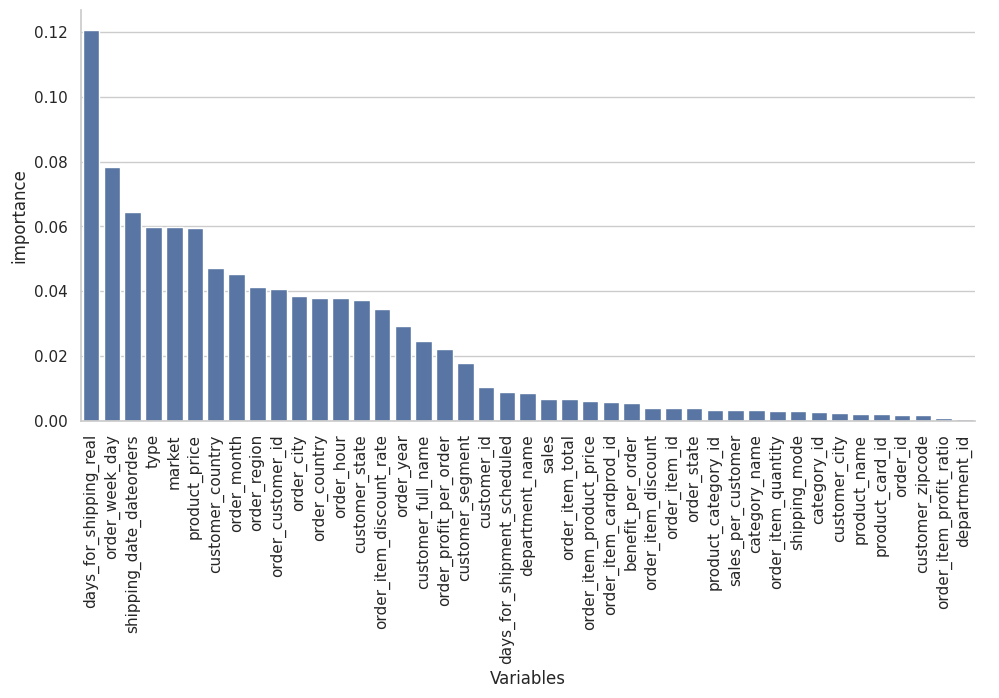

In [ ]:
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

Even though fraud detection is not at all related to Days for shipping(real) it is very surprising to see it was given an importance of 0.12. All other important parameters like customer full name, shipping mode, type of payment used are given an importance of 0.7 which helps the company to detect fraud accurately when same customer is conducting fraud.

Same way which variables were given importance for prediction of late delivery is found.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'days_for_shipping_real'),
  Text(1, 0, 'product_price'),
  Text(2, 0, 'order_week_day'),
  Text(3, 0, 'days_for_shipment_scheduled'),
  Text(4, 0, 'shipping_date_dateorders'),
  Text(5, 0, 'market'),
  Text(6, 0, 'order_item_discount_rate'),
  Text(7, 0, 'customer_state'),
  Text(8, 0, 'type'),
  Text(9, 0, 'order_country'),
  Text(10, 0, 'order_region'),
  Text(11, 0, 'order_month'),
  Text(12, 0, 'order_customer_id'),
  Text(13, 0, 'order_city'),
  Text(14, 0, 'order_hour'),
  Text(15, 0, 'customer_country'),
  Text(16, 0, 'customer_full_name'),
  Text(17, 0, 'order_profit_per_order'),
  Text(18, 0, 'customer_segment'),
  Text(19, 0, 'order_year'),
  Text(20, 0, 'customer_id'),
  Text(21, 0, 'order_item_product_price'),
  Tex

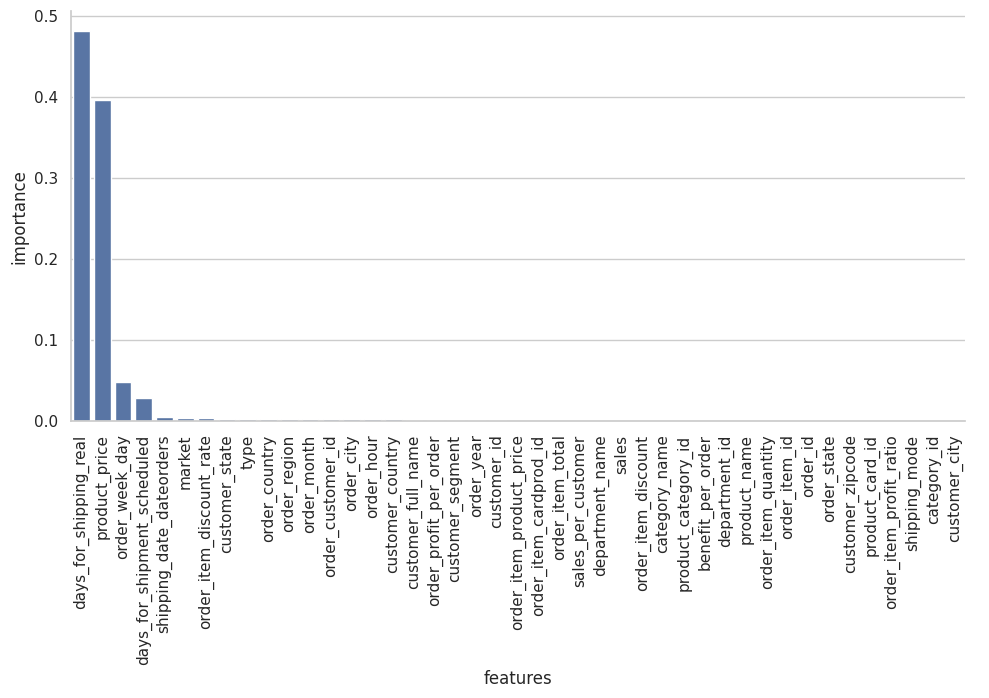

In [ ]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

# Overall Conclusion

This project focused on analyzing the **DataCo Supply Chain dataset** to identify and predict two key risks:  
**(1) Late Deliveries** and **(2) Fraudulent Orders.**  
Through systematic data cleaning, feature engineering, and machine learning classification models, the goal was to improve delivery reliability and detect fraud early in the supply chain.

---

##  1️⃣ Data Preparation and Exploration

- Comprehensive **data cleaning** steps were performed:
  - Handling missing values and fixing column data types.
  - Removing duplicates and correcting outliers.
  - Dropping irrelevant columns such as timestamps and redundant identifiers.

- **Key findings from EDA:**
  - About **55% of deliveries were late**, signaling operational inefficiencies.
  - **Western Europe** and **Central America** showed the **highest fraud activity**, with “TRANSFER” payment types frequently linked to suspicious transactions.
  - A small group of **customers and products** contributed disproportionately to total sales — important for targeted monitoring.

---

##  2️⃣ Modeling and Key Results

Two main **classification targets** were modeled:
1. **Late Delivery Risk**
2. **Fraud Detection**

The models used include:
- Logistic Regression  
- Gaussian Naive Bayes  
- Support Vector Machines (SVM)  
- K-Nearest Neighbors (KNN)  
- Decision Tree  
- Random Forest  
- Extra Trees  
- Extreme Gradient Boosting (XGBoost)

### 🔹 Model Comparison Summary

| Model | Fraud F1 (%) | Late Delivery F1 (%) | Comments |
|--------|---------------|---------------------|-----------|
| Logistic Regression | 30.8 | 98.96 | Simple baseline, fast but limited recall |
| Gaussian NB | 27.9 | 71.9 | Poor for correlated data |
| SVM | 29.3 | 98.96 | Performs well with scaling |
| KNN | 37.9 | 82.5 | Distance-based, moderate performance |
| Decision Tree | ⭐ 80.3 | ⭐ 99.47 | Best overall balance of accuracy and recall |
| Random Forest | 65.7 | 98.83 | Strong, but slightly less recall |
| Extra Trees | 63.7 | 99.30 | Stable and robust |
| XGBoost | 76.5 | 99.31 | High accuracy and generalization |

 **Conclusion:**  
The **Decision Tree Classifier** emerged as the **best performer**, achieving:
- **≈80% F1-score for fraud detection**
- **≈99% F1-score for late delivery**

This model offers strong interpretability, making it ideal for operational deployment.

---

##  3️⃣ Feature Importance Insights

### 🔸 Fraud Detection
- **Customer Full Name**, **Shipping Mode**, **Payment Type**, and **Order Region** had the highest importance.  
- These help identify repeat patterns or unusual payment behavior across regions.
- Surprisingly, **Days for Shipping (Real)** — not directly linked to fraud — had an importance of **0.12**, indicating mild correlation with anomalies.

### 🔸 Late Delivery Prediction
- **Days for Shipping (Real)**, **Days for Shipment (Scheduled)**, **Shipping Mode**, and **Order Region** were dominant predictors.  
- These features highlight where logistics delays occur and can guide efficiency improvements.

---

##  4️⃣ Business Implications

- **Fraud Detection:**  
  Enables proactive flagging of suspicious transactions, reducing financial loss and protecting brand trust.  
  Focus regions: Western Europe and Central America.  

- **Late Delivery Prediction:**  
  Helps logistics teams prioritize high-risk orders, adjust shipment methods, and ensure timely deliveries.  
  Reducing delays will enhance **customer satisfaction** and **operational reliability**.

---

##  5️⃣ Next Steps

- Implement **real-time fraud alert systems** using the Decision Tree or XGBoost model.
- Conduct **hyperparameter tuning** and **ensemble stacking** to further enhance precision and recall.
- Apply **model interpretability tools** (e.g., SHAP or LIME) to make insights explainable for business users.
- Integrate predictions into **Power BI or Tableau dashboards** for real-time monitoring.
- Enrich data with **external variables** (e.g., weather, holidays, supplier performance) for even better prediction accuracy.

---

 **In summary:**  
The project successfully demonstrated that **machine learning classification models** can significantly improve **supply chain visibility, fraud prevention, and delivery performance**.  
By operationalizing these models, the company can strengthen data-driven decision-making and improve customer experience across regions.

# **References**

bars, P., Smith, J., & Lyon, J. (2020). Python matplotlib multiple bars. Retrieved 17 April 2020, from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

Constante, Fabian; Silva, Fernando; Pereira, António (2019). DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS, Mendeley Data, v5. Retrieved 25 March 2020, from http://dx.doi.org/10.17632/8gx2fvg2k6.5#file-5046ef5f-6df4-4ee7-9eb8-b33456b0d49e

Explaining Feature Importance by example of a Random Forest. (2020). Retrieved 15 April 2020, from https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

sklearn.linear_model.LinearRegression — scikit-learn 0.22.2 documentation. (2020). Retrieved 14 April 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

trees?, H., & Dixit, H. (2020). HOW TO LABEL the FEATURE IMPORTANCE with forests of trees?. Retrieved 10 April 2020, from https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees
